<div style="text-align: center;">

# Modelo de Riesgo de Crédito
## Optimización e Inteligencia Artificial
### Universidad Nacional de Colombia sede Medellín  
**2024-2**

---

**Alejandra Uribe Sierra**  
aluribes@unal.edu.co

**Ronald Gabriel Palencia**  
ropalencia@unal.edu.co 

**Jeisson Steven Herrera Baquero**  
jesherrerabaq@unal.edu.co

**Brahian Steven Serna Restrepo**  
bserna@unal.edu.co

**Lili Johanna Gallego Arias**  
lgallego@unal.edu.co


</div>

Dataset: https://www.kaggle.com/datasets/ranadeep/credit-risk-dataset/data

# Análisis Exploratorio y Preprocesamiento de los Datos

## Depuración inicial

<p style="text-align: justify;">
El análisis descriptivo del conjunto de datos Credit Risk Dataset tiene como objetivo comprender la distribución y características de las variables involucradas en la evaluación del riesgo crediticio. Este análisis servirá como base para la formulación de hipótesis y la selección de variables clave para el modelado predictivo del riesgo crediticio.
</p>

## Importar Librerías

In [1]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


2025-03-02 03:02:24.794464: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-02 03:02:24.798569: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-02 03:02:24.878948: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-02 03:02:24.879127: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-02 03:02:24.880063: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to


## Cargar dataset

In [2]:
# Cargar los datos en un DataFrame
dataset = pd.read_csv("/work/credit-risk-dataset/loan.csv") # Modificar según ubicación

# Crear una copia del DataFrame
df = dataset.copy()

# Inspeccionar los datos
df.head()

/tmp/ipykernel_40/1730022169.py:2: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("/work/credit-risk-dataset/loan.csv") # Modificar según ubicación


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape


(887379, 74)

<p style="text-align: justify;">
El conjunto de datos contiene originalmente <strong>887379</strong> registros y <strong>74</strong> columnas. En los datos proporcionados en Credit Risk Dataset, se incluye un archivo de descripción de las variables. A continuación, se muestran los nombres de las variables y sus descripciones traducidas.
</p>

In [4]:
import pandas as pd

# Crear un diccionario con los nombres de las variables y sus descripciones traducidas
data = {
    "Variable": [
        "addr_state", "annual_inc", "annual_inc_joint", "application_type", "collection_recovery_fee",
        "collections_12_mths_ex_med", "delinq_2yrs", "desc", "dti", "dti_joint", "earliest_cr_line",
        "emp_length", "emp_title", "fico_range_high", "fico_range_low", "funded_amnt", "funded_amnt_inv",
        "grade", "home_ownership", "id", "initial_list_status", "inq_last_6mths", "installment",
        "int_rate", "is_inc_v", "issue_d", "last_credit_pull_d", "last_fico_range_high",
        "last_fico_range_low", "last_pymnt_amnt", "last_pymnt_d", "loan_amnt", "loan_status",
        "member_id", "mths_since_last_delinq", "mths_since_last_major_derog", "mths_since_last_record",
        "next_pymnt_d", "open_acc", "out_prncp", "out_prncp_inv", "policy_code", "pub_rec",
        "purpose", "pymnt_plan", "recoveries", "revol_bal", "revol_util", "sub_grade",
        "term", "title", "total_acc", "total_pymnt", "total_pymnt_inv", "total_rec_int",
        "total_rec_late_fee", "total_rec_prncp", "url", "verified_status_joint", "zip_code",
        "open_acc_6m", "open_il_6m", "open_il_12m", "open_il_24m", "mths_since_rcnt_il",
        "total_bal_il", "il_util", "open_rv_12m", "open_rv_24m", "max_bal_bc", "all_util",
        "total_rev_hi_lim", "inq_fi", "total_cu_tl", "inq_last_12m", "acc_now_delinq",
        "tot_coll_amt", "tot_cur_bal"
    ],
    "Descripción en Español": [
        "El estado proporcionado por el prestatario en la solicitud de préstamo.",
        "El ingreso anual autoinformado proporcionado por el prestatario durante el registro.",
        "El ingreso anual combinado autoinformado proporcionado por los co-prestatarios durante el registro.",
        "Indica si el préstamo es una solicitud individual o una solicitud conjunta con dos co-prestatarios.",
        "Tarifa de cobro después de la cancelación del cobro.",
        "Número de cobranzas en 12 meses, excluyendo cobranzas médicas.",
        "Número de incidencias de morosidad de más de 30 días en el historial de crédito del prestatario en los últimos 2 años.",
        "Descripción del préstamo proporcionada por el prestatario.",
        "Un ratio calculado usando los pagos mensuales totales de deuda del prestatario sobre sus obligaciones totales de deuda, excluyendo hipotecas y el préstamo solicitado, dividido por el ingreso mensual autoinformado del prestatario.",
        "Un ratio calculado usando los pagos mensuales totales de los co-prestatarios sobre sus obligaciones totales de deuda, excluyendo hipotecas y el préstamo solicitado, dividido por el ingreso mensual combinado autoinformado de los co-prestatarios.",
        "El mes en que se abrió la primera línea de crédito registrada del prestatario.",
        "Duración del empleo en años. Los valores posibles están entre 0 y 10, donde 0 significa menos de un año y 10 significa diez años o más.",
        "El título del trabajo proporcionado por el prestatario al solicitar el préstamo.",
        "El límite superior del rango FICO del prestatario al inicio del préstamo.",
        "El límite inferior del rango FICO del prestatario al inicio del préstamo.",
        "El monto total comprometido con el préstamo en ese momento.",
        "El monto total comprometido por los inversionistas para ese préstamo en ese momento.",
        "Calificación asignada al préstamo por LC.",
        "Estado de propiedad de vivienda proporcionado por el prestatario durante el registro. Valores posibles: RENT, OWN, MORTGAGE, OTHER.",
        "Un identificador único asignado por LC para la lista del préstamo.",
        "Estado inicial de la lista del préstamo. Valores posibles: W, F.",
        "Número de consultas en los últimos 6 meses (excluyendo consultas de autos e hipotecas).",
        "El pago mensual que debe el prestatario si el préstamo se origina.",
        "Tasa de interés del préstamo.",
        "Indica si el ingreso fue verificado por LC, no verificado o si se verificó la fuente de ingresos.",
        "El mes en que se financió el préstamo.",
        "El mes más reciente en que LC consultó el crédito para este préstamo.",
        "El límite superior del último rango FICO consultado del prestatario.",
        "El límite inferior del último rango FICO consultado del prestatario.",
        "Último monto total del pago recibido.",
        "Último mes en que se recibió un pago.",
        "Monto listado del préstamo solicitado por el prestatario. Si en algún momento el departamento de crédito reduce el monto del préstamo, esto se reflejará en este valor.",
        "Estado actual del préstamo.",
        "Un identificador único asignado por LC al prestatario.",
        "Número de meses desde la última morosidad del prestatario.",
        "Número de meses desde la calificación más baja reciente de 90 días o peor.",
        "Número de meses desde el último registro público.",
        "Fecha programada del próximo pago.",
        "Número de líneas de crédito abiertas en el historial de crédito del prestatario.",
        "Principal pendiente restante para el monto total financiado.",
        "Principal pendiente restante para la porción del monto total financiado por inversionistas.",
        "Código de política disponible públicamente.",
        "Número de registros públicos negativos.",
        "Categoría proporcionada por el prestatario para la solicitud de préstamo.",
        "Indica si se ha establecido un plan de pagos para el préstamo.",
        "Recuperación bruta posterior a la cancelación del cobro.",
        "Saldo total de crédito rotativo.",
        "Tasa de utilización de la línea de crédito rotativa, o el monto de crédito que el prestatario está utilizando en relación con todo el crédito rotativo disponible.",
        "Subcategoría de calificación asignada al préstamo por LC.",
        "Número de pagos en el préstamo. Valores en meses: 36 o 60.",
        "Título del préstamo proporcionado por el prestatario.",
        "Número total de líneas de crédito actualmente en el historial crediticio del prestatario.",
        "Pagos recibidos hasta la fecha para el monto total financiado.",
        "Pagos recibidos hasta la fecha para la porción del monto total financiado por inversionistas.",
        "Intereses recibidos hasta la fecha.",
        "Cargos por mora recibidos hasta la fecha.",
        "Capital recibido hasta la fecha.",
        "URL de la página de LC con datos de la lista.",
        "Indica si los ingresos conjuntos de los co-prestatarios fueron verificados por LC, no verificados o si se verificó la fuente de ingresos.",
        "Los primeros 3 números del código postal proporcionado por el prestatario en la solicitud de préstamo.",
        "Número de transacciones de crédito abiertas en los últimos 6 meses.",
        "Número de transacciones de préstamos a plazos actualmente activas.",
        "Número de cuentas de préstamos a plazos abiertas en los últimos 12 meses.",
        "Número de cuentas de préstamos a plazos abiertas en los últimos 24 meses.",
        "Meses desde la cuenta de préstamos a plazos más reciente.",
        "Saldo total actual de todas las cuentas a plazos.",
        "Relación entre saldo actual total y límite de crédito en todas las cuentas a plazos.",
        "Número de transacciones de crédito rotativo abiertas en los últimos 12 meses.",
        "Número de transacciones de crédito rotativo abiertas en los últimos 24 meses.",
        "Saldo máximo actual adeudado en todas las cuentas de crédito rotativo.",
        "Relación entre saldo y límite de crédito en todas las transacciones.",
        "Límite de crédito total en líneas de crédito rotativas.",
        "Número de consultas de financiamiento personal.",
        "Número de transacciones de financiamiento.",
        "Número de consultas de crédito en los últimos 12 meses.",
        "Número de cuentas en las que el prestatario está actualmente en mora.",
        "Montos totales de cobro alguna vez adeudados.",
        "Saldo total actual de todas las cuentas."
    ]
}

# Crear un DataFrame
df_descriptions = pd.DataFrame(data)

df_descriptions

,Variable,Descripción en Español
0,addr_state,El estado proporcionado por el prestatario en ...
1,annual_inc,El ingreso anual autoinformado proporcionado p...
2,annual_inc_joint,El ingreso anual combinado autoinformado propo...
3,application_type,Indica si el préstamo es una solicitud individ...
4,collection_recovery_fee,Tarifa de cobro después de la cancelación del ...
...,...,...
73,total_cu_tl,Número de transacciones de financiamiento.
74,inq_last_12m,Número de consultas de crédito en los últimos ...
75,acc_now_delinq,Número de cuentas en las que el prestatario es...
76,tot_coll_amt,Montos totales de cobro alguna vez adeudados.


<p align="center"><strong>Tabla 1:</strong> Descripción de las columnas de la base de datos.</p>

<p align="center"><em style="font-size: smaller;">Dark_Rider. (2021). Credit Risk Analysis. Kaggle. <a href="https://www.kaggle.com/datasets/ranadeep/credit-risk-dataset/data">https://www.kaggle.com/datasets/ranadeep/credit-risk-dataset/data</a></em></p>

<p style="text-align: justify;">
Algunos términos no intuitivos son los siguientes:
</p>

<p style="text-align: justify;">
- <strong>FICO (Fair Isaac Corporation Score):</strong> Es una puntuación de crédito utilizada por los prestamistas para evaluar la solvencia de un prestatario, basada en su historial crediticio.</p>

<p style="text-align: justify;">
- <strong>LC (LendingClub):</strong> Es una plataforma de préstamos peer-to-peer (P2P) en la que los prestatarios pueden solicitar préstamos y los inversores pueden financiar estos préstamos.</p>

<p style="text-align: justify;">
- <strong>DTI (Debt-to-Income Ratio):</strong> Es la relación entre la deuda total mensual de una persona y su ingreso mensual bruto.</p>

<p style="text-align: justify;">
- <strong>Revol_bal (Revolving Balance):</strong> Es el saldo pendiente en cuentas de crédito rotativo, como tarjetas de crédito.</p>

<p style="text-align: justify;">
- <strong>Revol_util (Revolving Utilization Rate):</strong> Es el porcentaje del crédito rotativo disponible que el prestatario está utilizando.</p>

<p style="text-align: justify;">
Ahora bien, a partir de la descripción de las variables, se pueden observar algunos tipos de variables que no son de interés, como variables identificadoras o variables relacionadas con fechas o url's y también la variable subgrade ya que es prácticamente igual a grade, por lo que estas variables se eliminan.
</p>

In [5]:
# Eliminar las variables especificadas
columns_to_drop = ["id", "member_id", "issue_d", "earliest_cr_line", "last_credit_pull_d", "last_pymnt_d", "next_pymnt_d", "url", "zip_code", "subgrade"]
df = df.drop(columns=columns_to_drop, errors='ignore')

In [6]:
def calcular_porcentaje_nulos(df):
    porcentaje_nulos = (df.isnull().sum() / len(df)) * 100
    resultado = pd.DataFrame({'Columna': df.columns, 'Porcentaje_Nulos': porcentaje_nulos.values})
    return resultado.sort_values(by='Porcentaje_Nulos', ascending=False)

# Llamada a la función con tu DataFrame
df_nulos = calcular_porcentaje_nulos(df)
df_nulos = df_nulos[df_nulos['Porcentaje_Nulos'] > 30]
print(df_nulos)

                        Columna  Porcentaje_Nulos
45                    dti_joint         99.942640
44             annual_inc_joint         99.942415
46    verification_status_joint         99.942415
56                      il_util         97.902024
54           mths_since_rcnt_il         97.654892
53                  open_il_24m         97.591559
52                  open_il_12m         97.591559
55                 total_bal_il         97.591559
60                     all_util         97.591559
62                       inq_fi         97.591559
51                   open_il_6m         97.591559
50                  open_acc_6m         97.591559
64                 inq_last_12m         97.591559
63                  total_cu_tl         97.591559
59                   max_bal_bc         97.591559
58                  open_rv_24m         97.591559
57                  open_rv_12m         97.591559
15                         desc         85.797951
23       mths_since_last_record         84.555303


In [7]:
# Obtener las columnas a eliminar desde df_nulos
columnas_a_eliminar = df_nulos['Columna'].tolist()

# Eliminar las columnas del DataFrame df
df = df.drop(columns=columnas_a_eliminar, errors='ignore')

# Mostrar las columnas eliminadas
print("Columnas eliminadas:", columnas_a_eliminar)

Columnas eliminadas: ['dti_joint', 'annual_inc_joint', 'verification_status_joint', 'il_util', 'mths_since_rcnt_il', 'open_il_24m', 'open_il_12m', 'total_bal_il', 'all_util', 'inq_fi', 'open_il_6m', 'open_acc_6m', 'inq_last_12m', 'total_cu_tl', 'max_bal_bc', 'open_rv_24m', 'open_rv_12m', 'desc', 'mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_last_delinq']


In [8]:
# Contar cuántas variables son categóricas y cuántas son numéricas
num_vars = df.select_dtypes(include=['number']).shape[1]
cat_vars = df.select_dtypes(exclude=['number']).shape[1]

num_vars, cat_vars

(30, 14)

<p style="text-align: justify;">
De las variables restantes después de la eliminación inicial, se analiza el porcentaje de valores nulos en cada una de las columnas restantes. En total son 21 variables con porcentaje mayor al 30% de nulos, por lo que se realiza su eliminación, obteniendo así un total de <strong>44 variables</strong>, de las cuales <strong>30</strong> son <strong>numéricas</strong> y <strong>14</strong> son <strong>categóricas</strong>, una de estas últimas siendo la variable objetivo.
</p>

In [9]:
# Obtener los nombres de las columnas numéricas
columnas_numericas = df.select_dtypes(include=['number']).columns.tolist()

# Obtener los nombres de las columnas categóricas
columnas_categoricas = df.select_dtypes(exclude=['number']).columns.tolist()

## Estadísticas de las variables numéricas

<p style="text-align: justify;">
A continuación, se podrán observar las estadísticas descriptivas de las columnas numéricas.
</p

In [10]:
df[columnas_numericas].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,887350.000000,...,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,887379.0,887350.000000,8.171030e+05,8.171030e+05,8.171030e+05
mean,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,0.694623,11.548469,...,0.396692,45.919243,4.880757,2164.145585,0.014380,1.0,0.004991,2.257026e+02,1.394582e+05,3.206862e+04
std,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,0.998448,5.317313,...,4.087825,409.693874,63.125281,4794.783233,0.134191,0.0,0.077625,1.031137e+04,1.537500e+05,3.749826e+04
min,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,0.000000,8.000000,...,0.000000,0.000000,0.000000,280.170000,0.000000,1.0,0.000000,0.000000e+00,2.985300e+04,1.390000e+04
50%,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,0.000000,11.000000,...,0.000000,0.000000,0.000000,462.780000,0.000000,1.0,0.000000,0.000000e+00,8.055900e+04,2.370000e+04
75%,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,1.000000,14.000000,...,0.000000,0.000000,0.000000,831.245000,0.000000,1.0,0.000000,0.000000e+00,2.082050e+05,3.980000e+04
max,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,33.000000,90.000000,...,358.680000,33520.270000,7002.190000,36475.590000,20.000000,1.0,14.000000,9.152545e+06,8.000078e+06,9.999999e+06


<p align="center"><strong>Tabla 2:</strong> Estadísticas descriptivas de las variables numéricas.</p>

<p align="center"><em style="font-size: smaller;">Elaboración propia.</em></p>

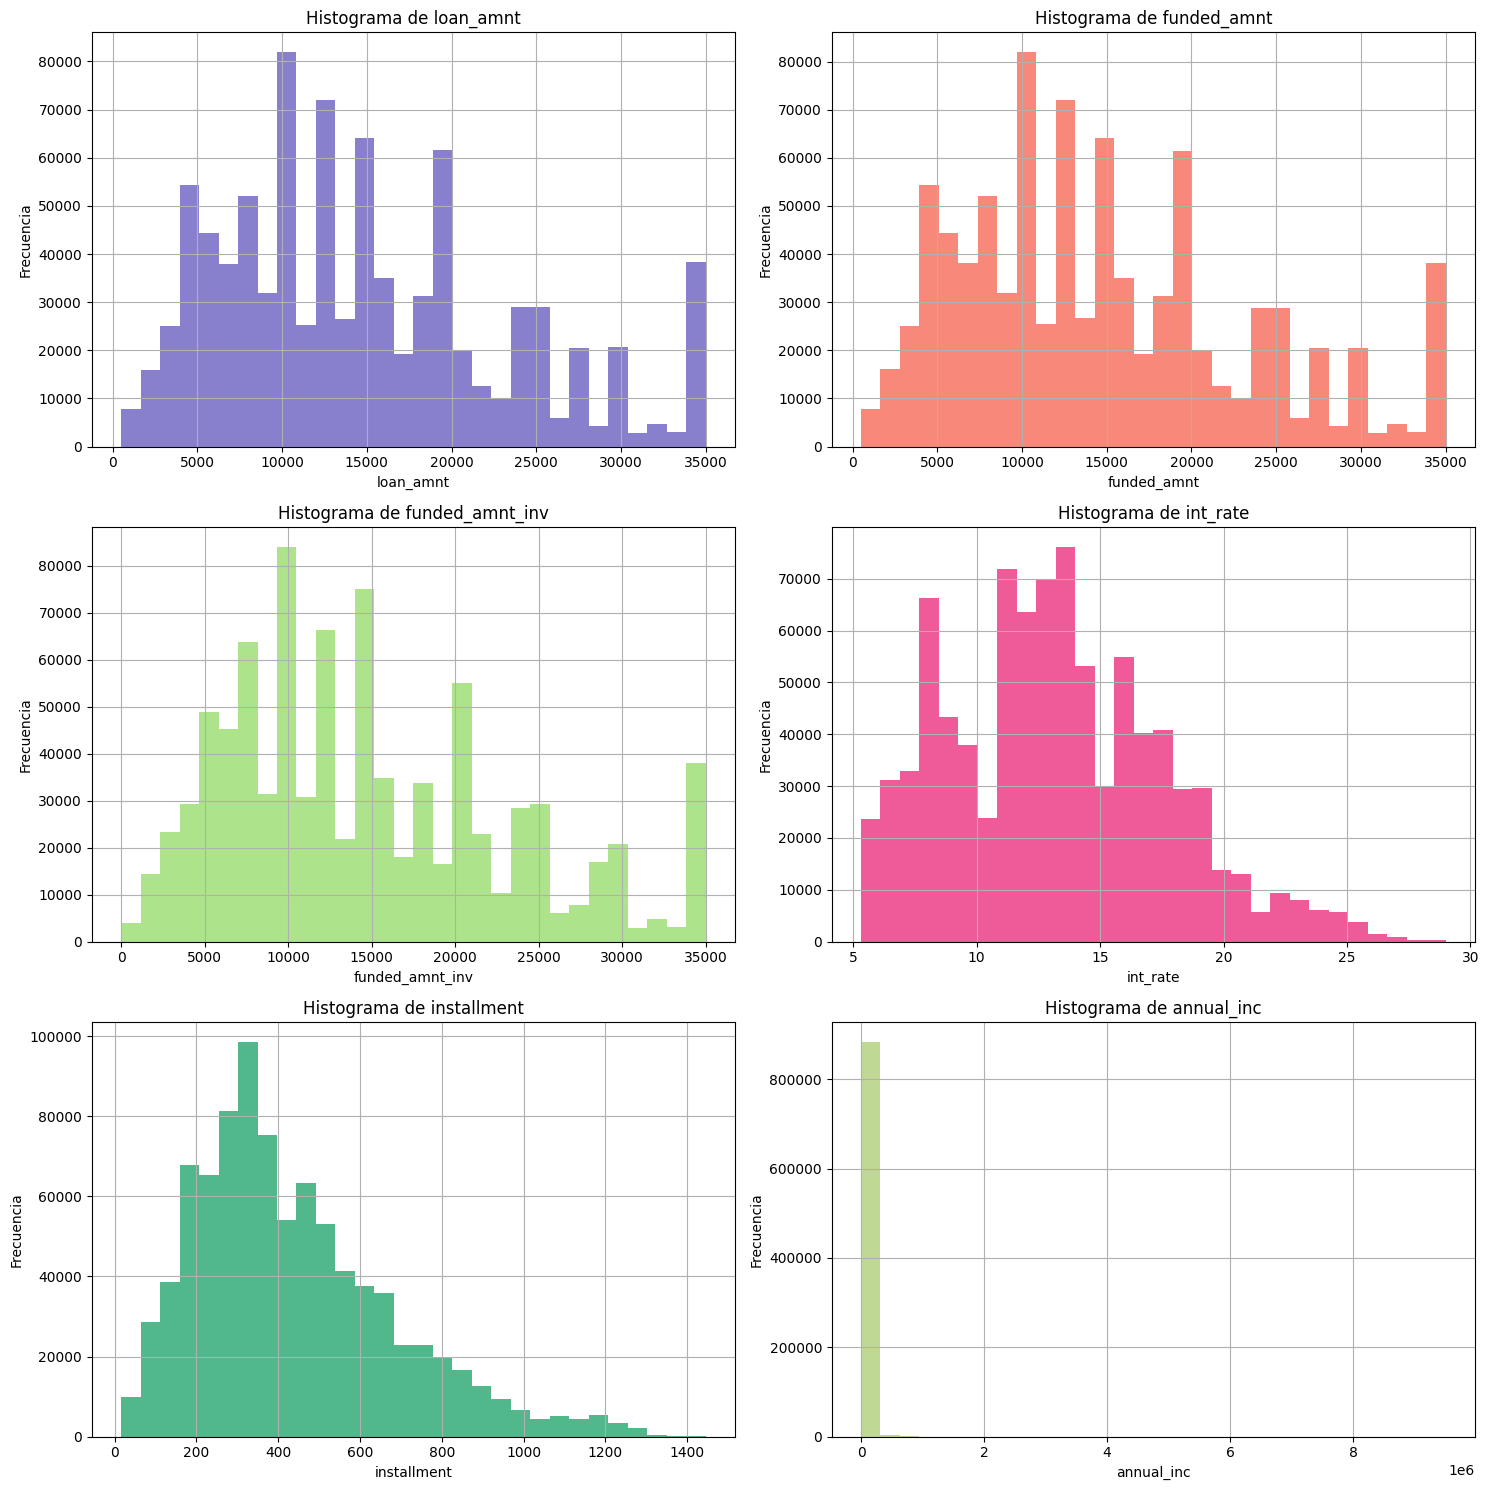

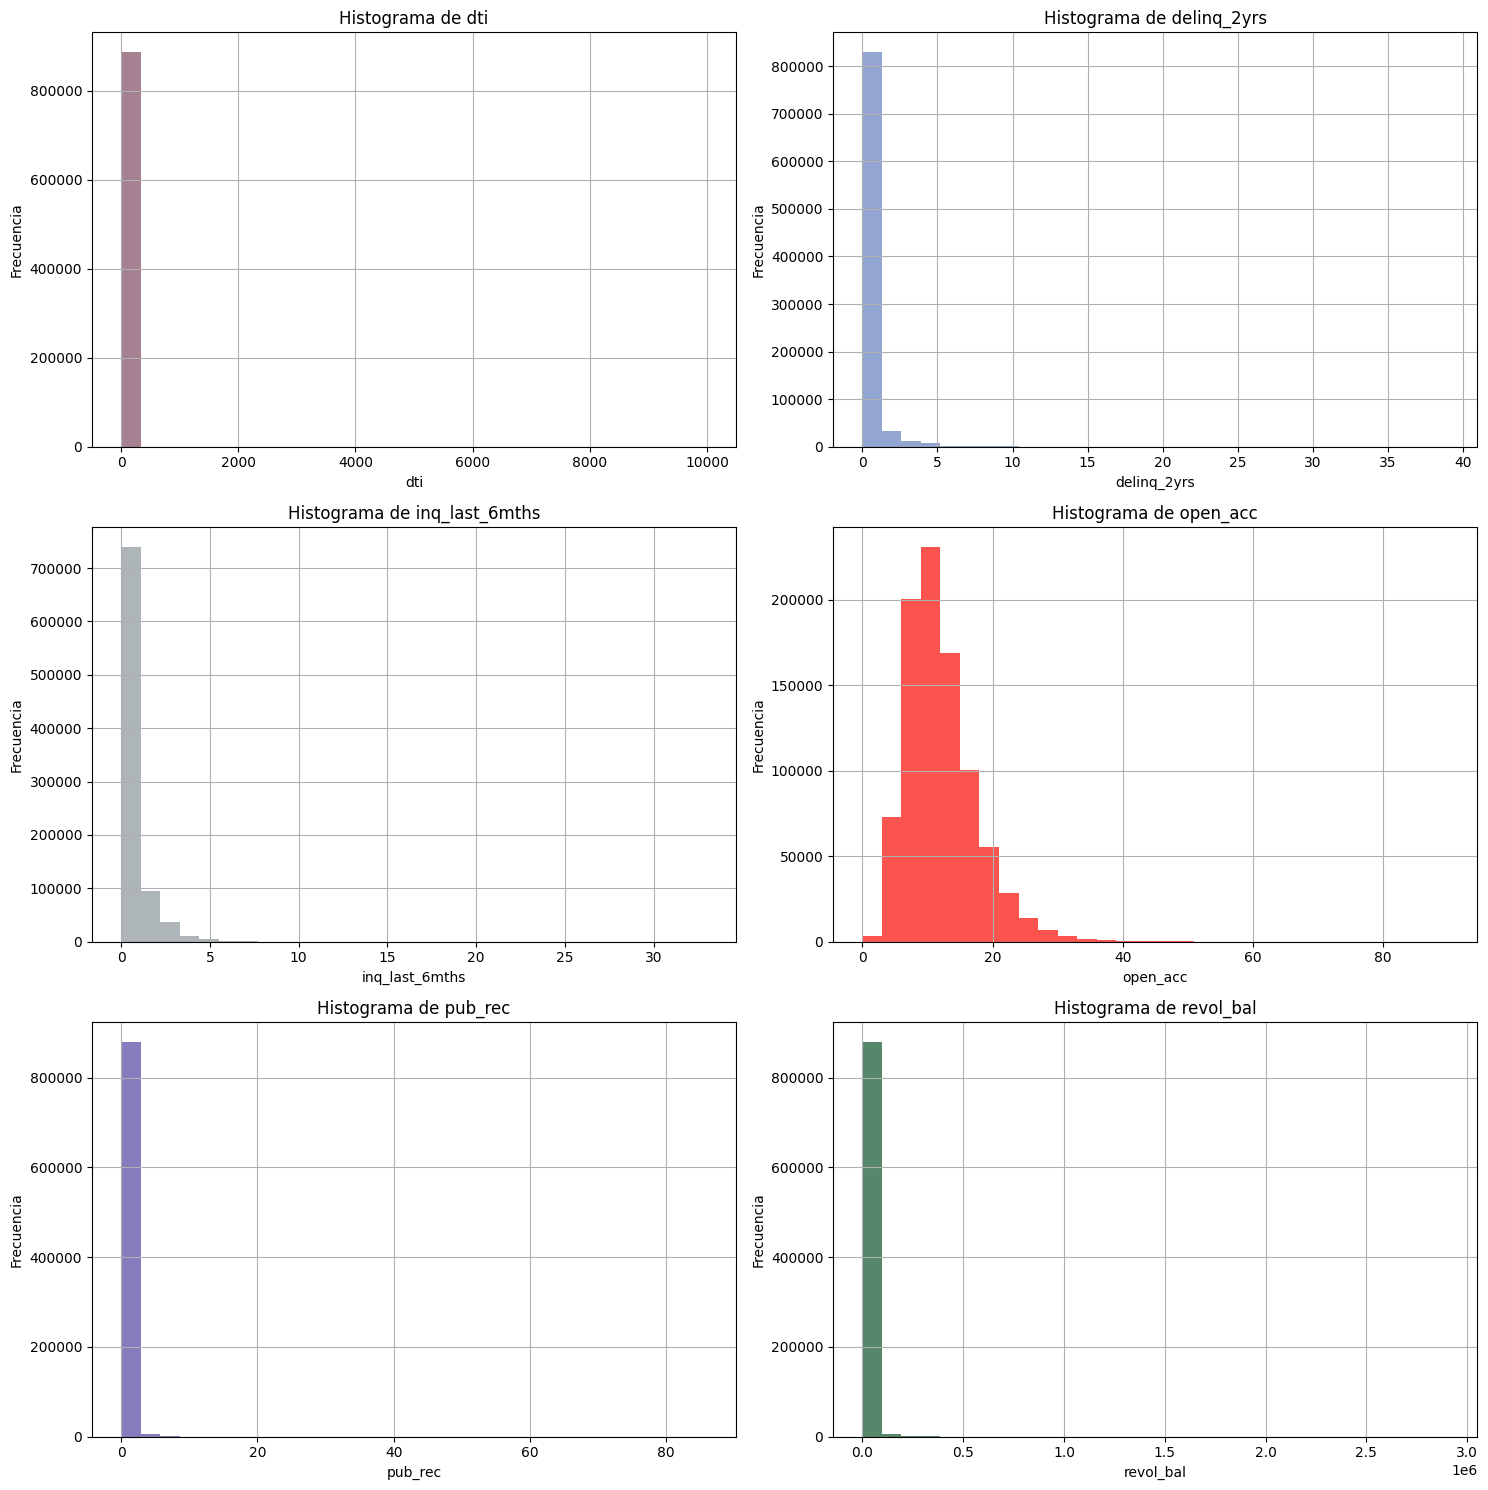

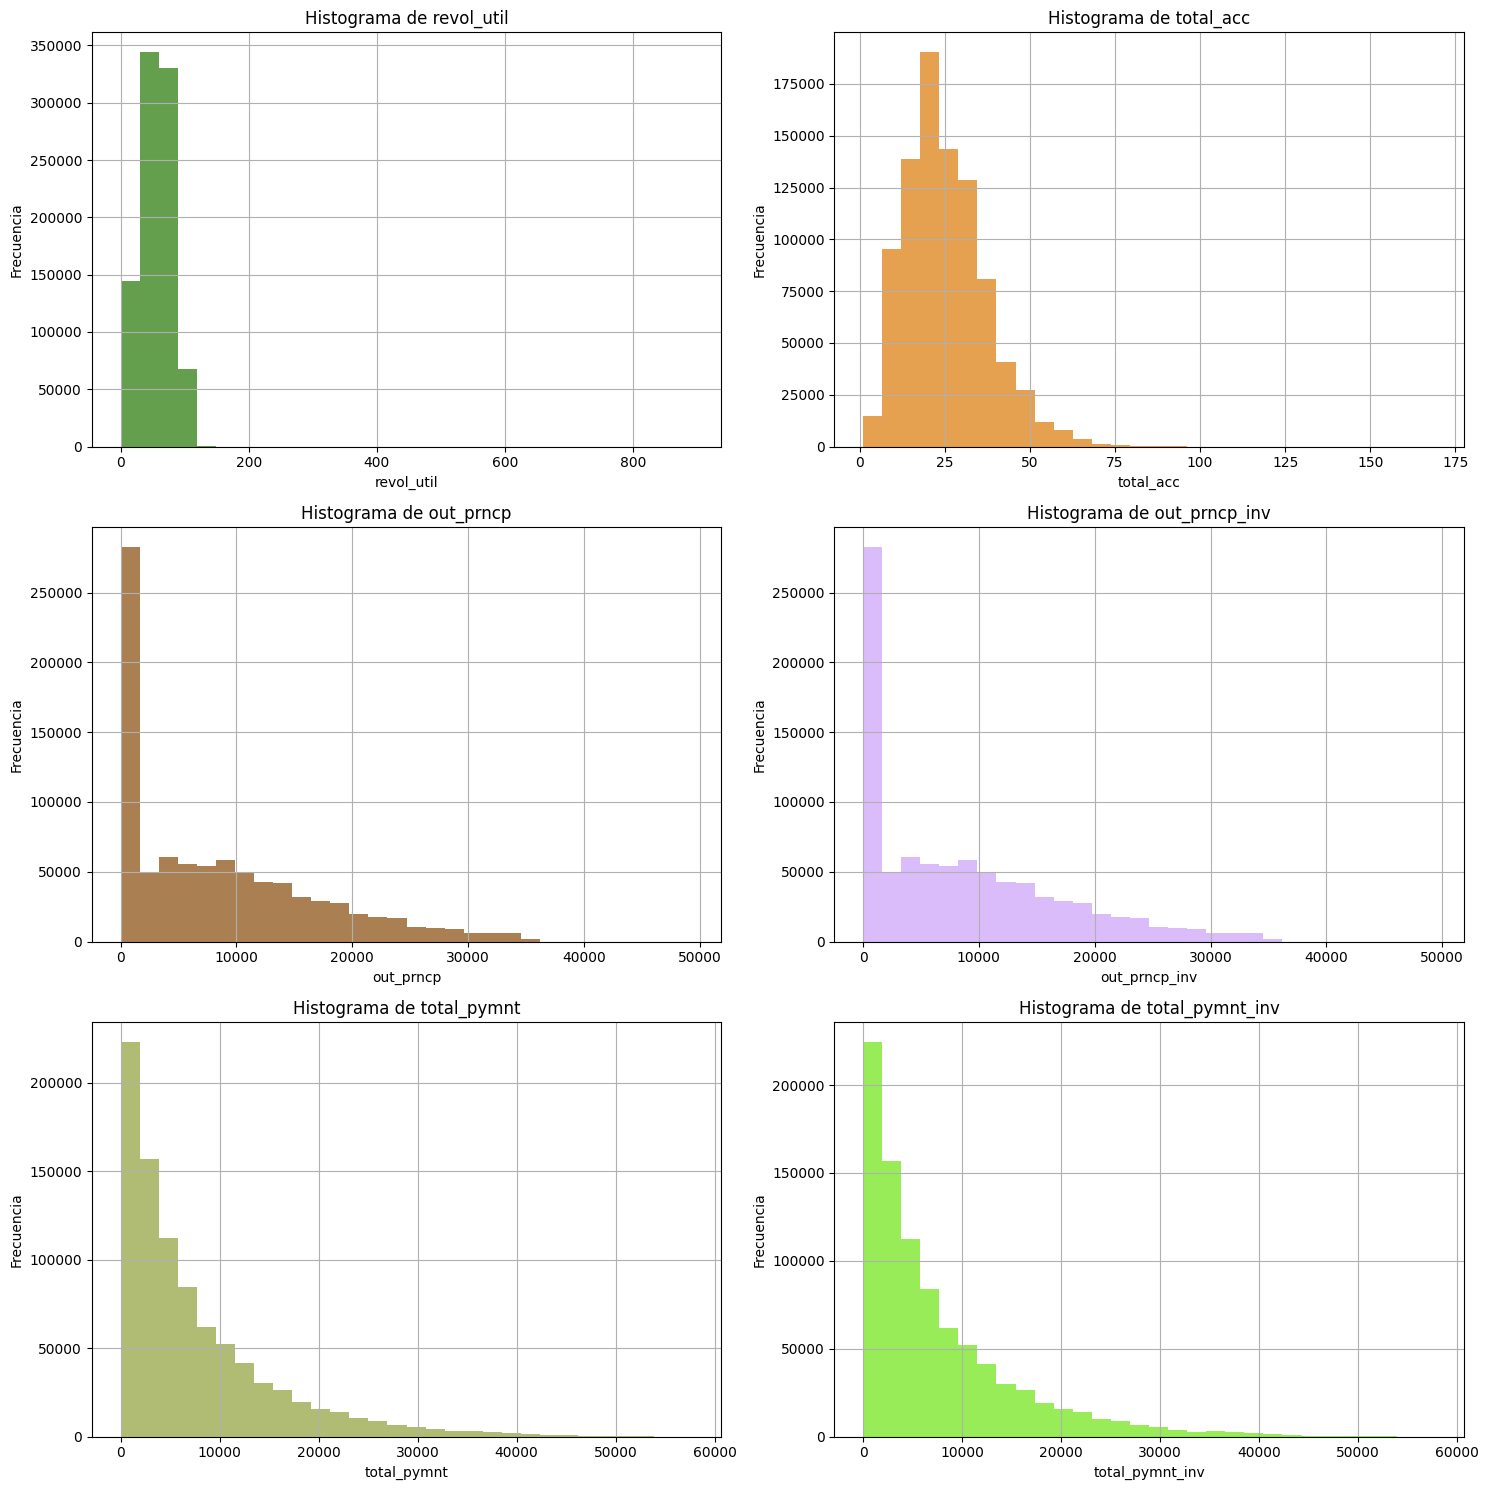

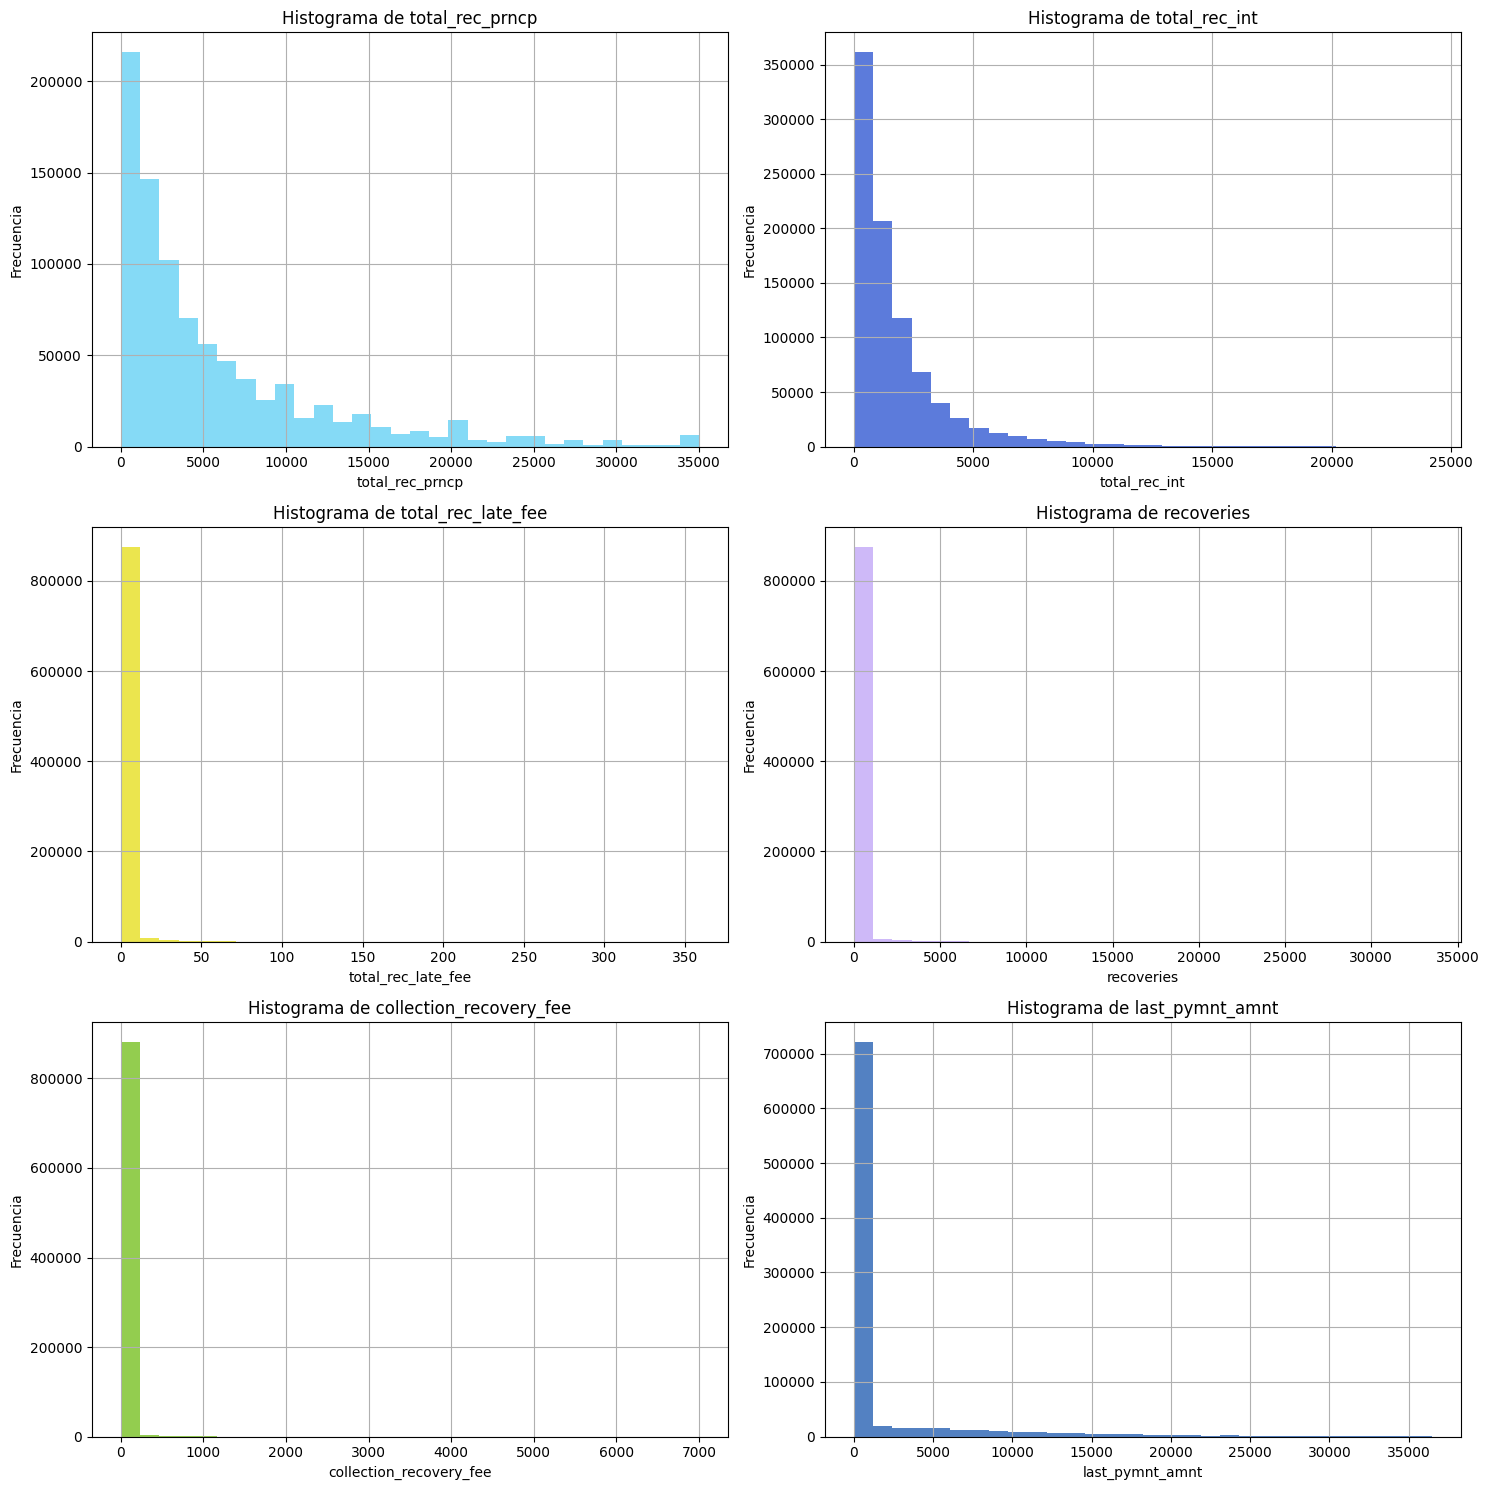

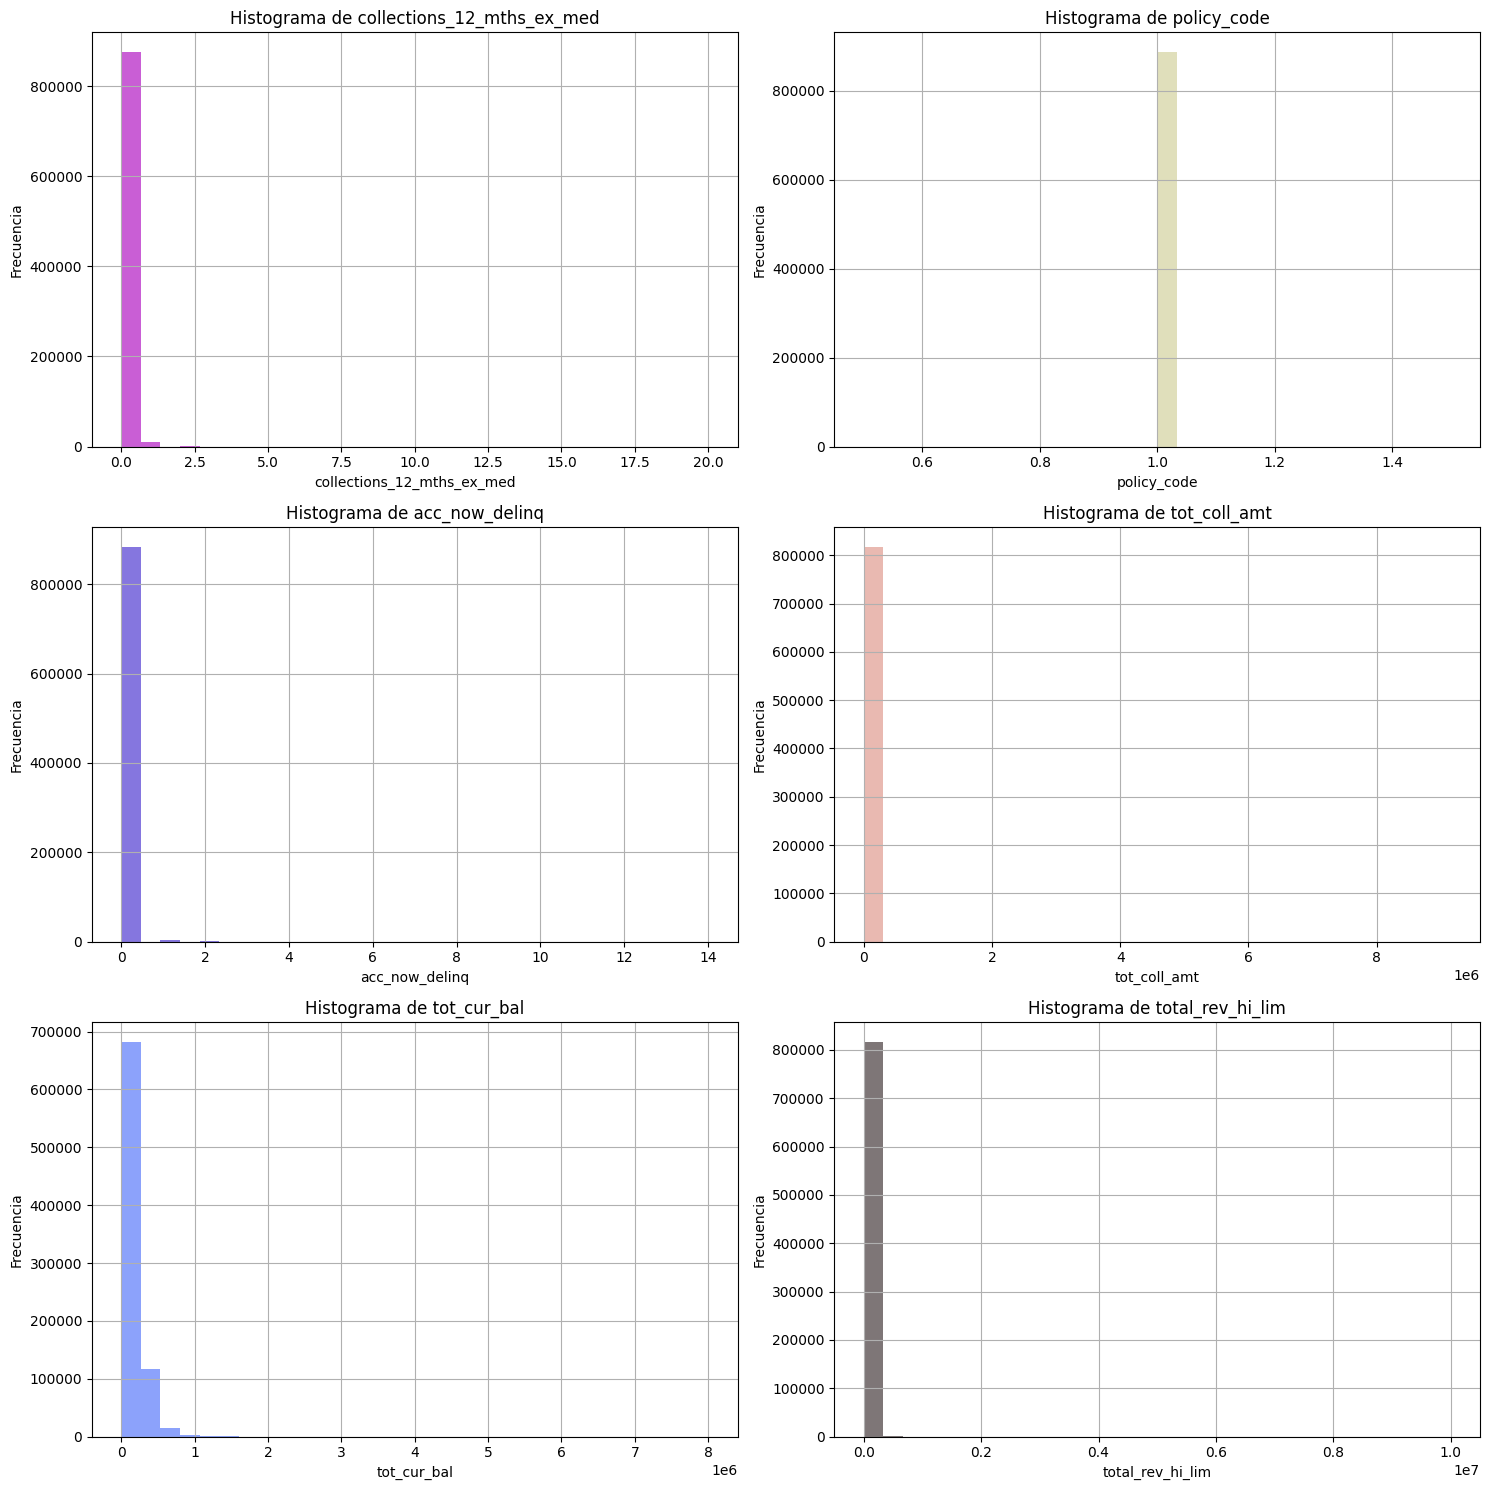

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Número de histogramas por figura
num_histogramas_por_figura = 6  # Para mostrar en 2 columnas (ajustable)

# Dividir las columnas numéricas en grupos
for i in range(0, len(columnas_numericas), num_histogramas_por_figura):
    columnas_subset = columnas_numericas[i:i + num_histogramas_por_figura]
    
    # Calcular filas necesarias (dos columnas por fila)
    num_filas = math.ceil(len(columnas_subset) / 2)

    # Crear la figura con un diseño de subgráficos de 2 columnas
    fig, axes = plt.subplots(nrows=num_filas, ncols=2, figsize=(15, 5 * num_filas))

    # Asegurar que siempre tengamos una lista de ejes (en caso de 1 fila)
    axes = axes.flatten() if num_filas > 1 else np.array([axes]).flatten()

    # Generar los histogramas
    for ax, col in zip(axes, columnas_subset):
        df[col].hist(bins=30, ax=ax, alpha=0.7, color=np.random.rand(3,))
        ax.set_title(f'Histograma de {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frecuencia')

    # Eliminar gráficos vacíos si hay menos de `num_filas * 2` gráficos
    for j in range(len(columnas_subset), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


<p align="center"><strong>Figura 2:</strong> Histogramas de las variables numéricas.</p>

<p align="center"><em style="font-size: smaller;">Elaboración propia.</em></p>

In [12]:
# Calcular el número de valores únicos en cada columna
conteo_valores_unicos = df.nunique()

# Convertir en DataFrame para mejor visualización
df_conteo_unicos = pd.DataFrame(conteo_valores_unicos.items(), columns=["Columna", "Valores Únicos"])
df_conteo_unicos

,Columna,Valores Únicos
0,loan_amnt,1372
1,funded_amnt,1372
2,funded_amnt_inv,9856
3,term,2
4,int_rate,542
5,installment,68711
6,grade,7
7,sub_grade,35
8,emp_title,299271
9,emp_length,11


<p style="text-align: justify;">
Se puede observar que la variable "policy_code" cuenta con un único valor para todos los registros, por lo que se elimina y también eliminamos las columnas que tienen una cantidad de elementos en 0 mayores al 60%.
</p>

In [13]:
columnas_con_ceros = df.columns[(df == 0).mean() > 0.60]
columnas_con_ceros

In [ ]:
df = df.drop(columns = columnas_con_ceros)

In [14]:
df = df.drop(columns=["policy_code"])

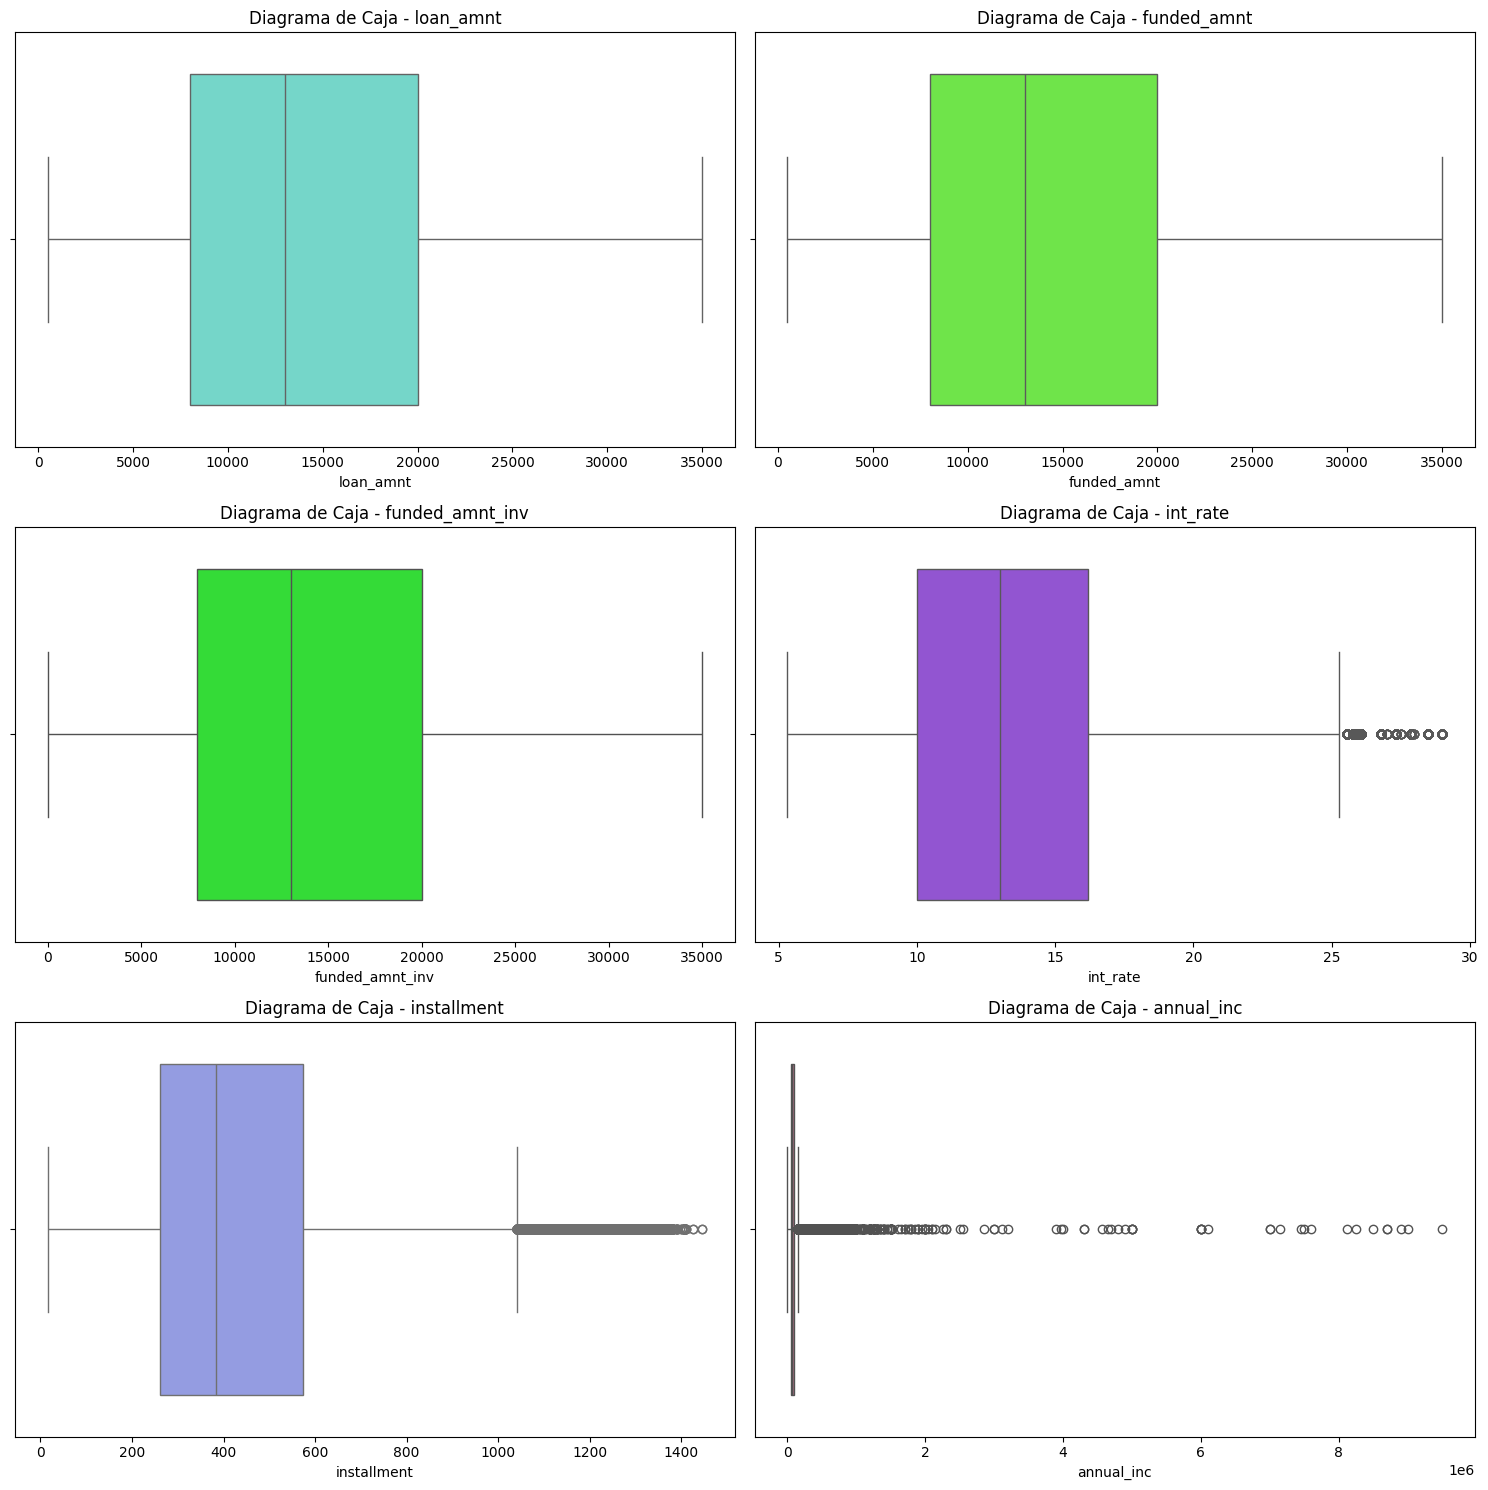

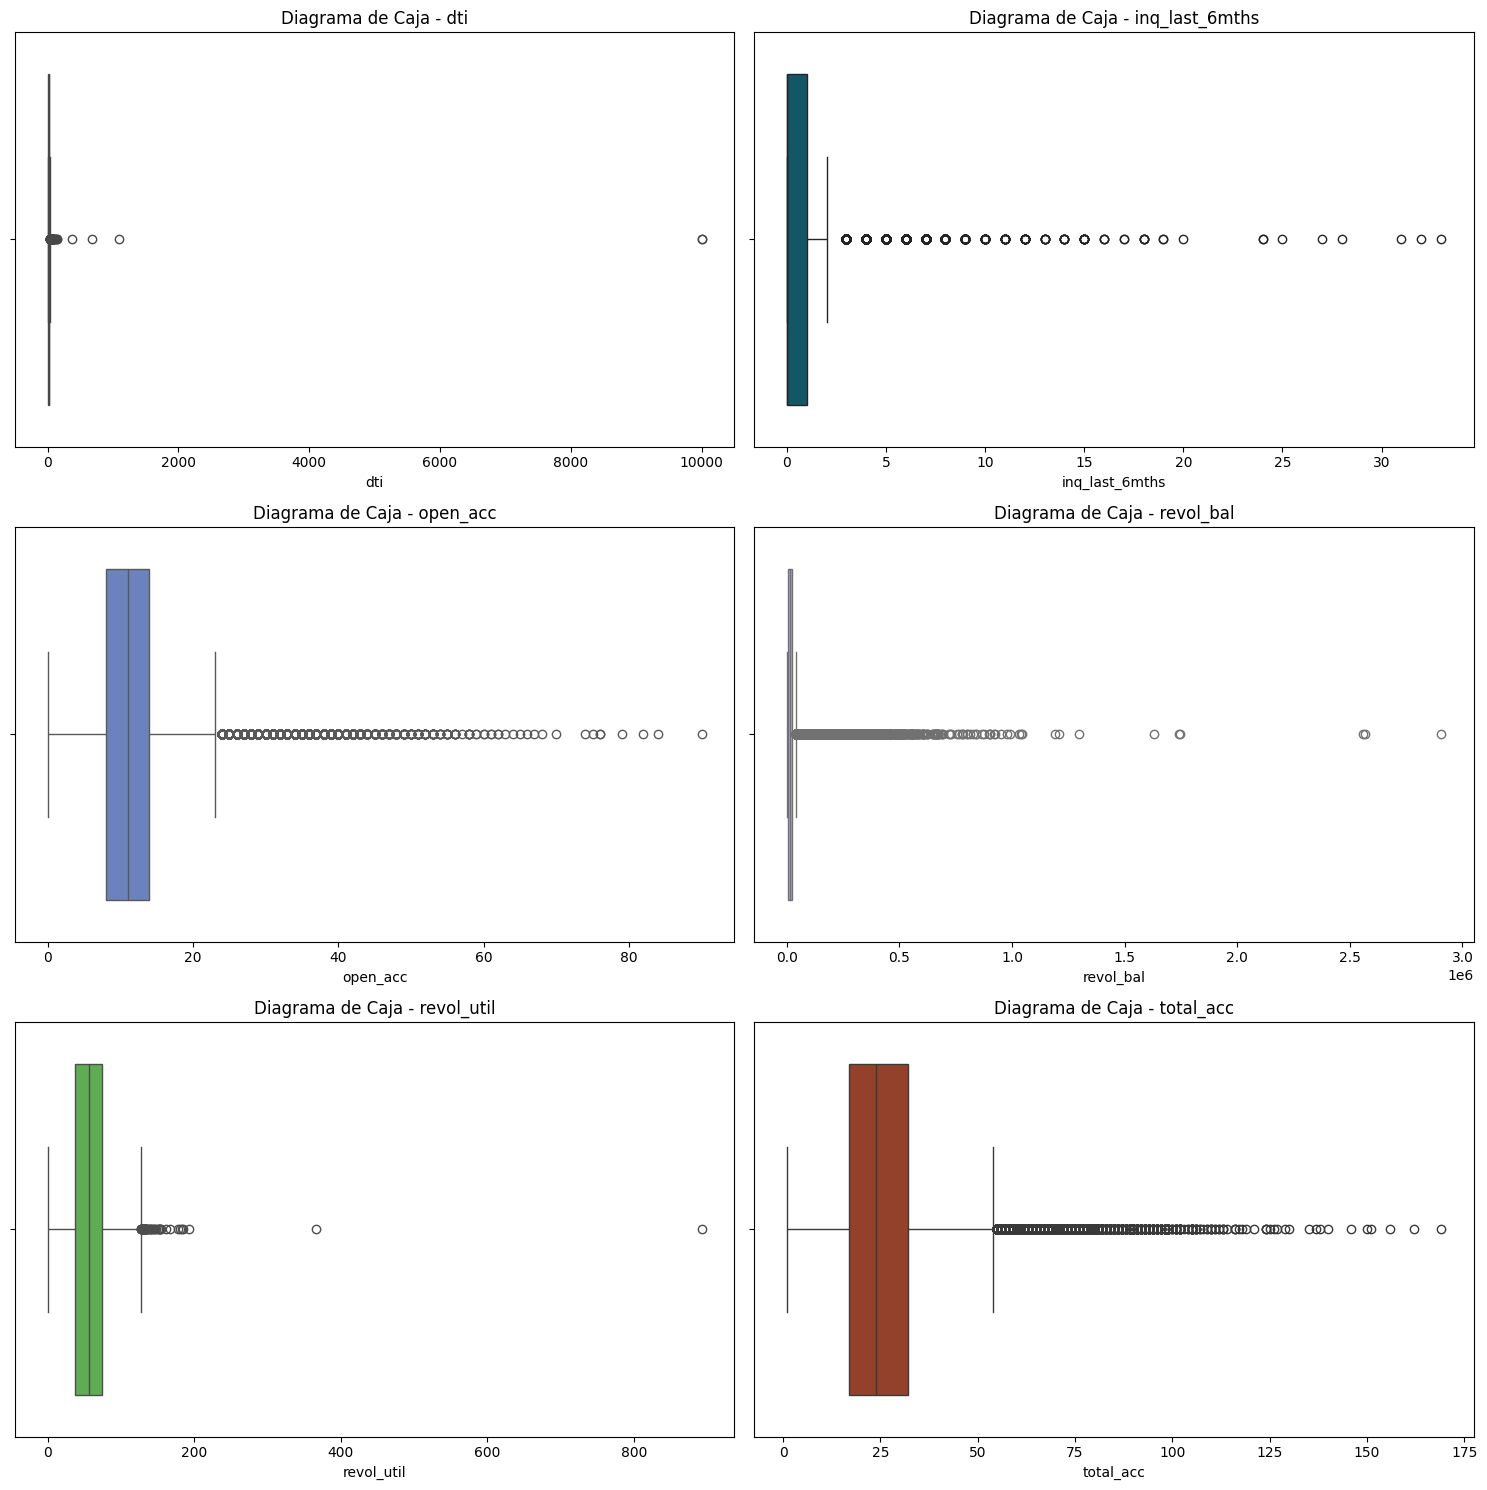

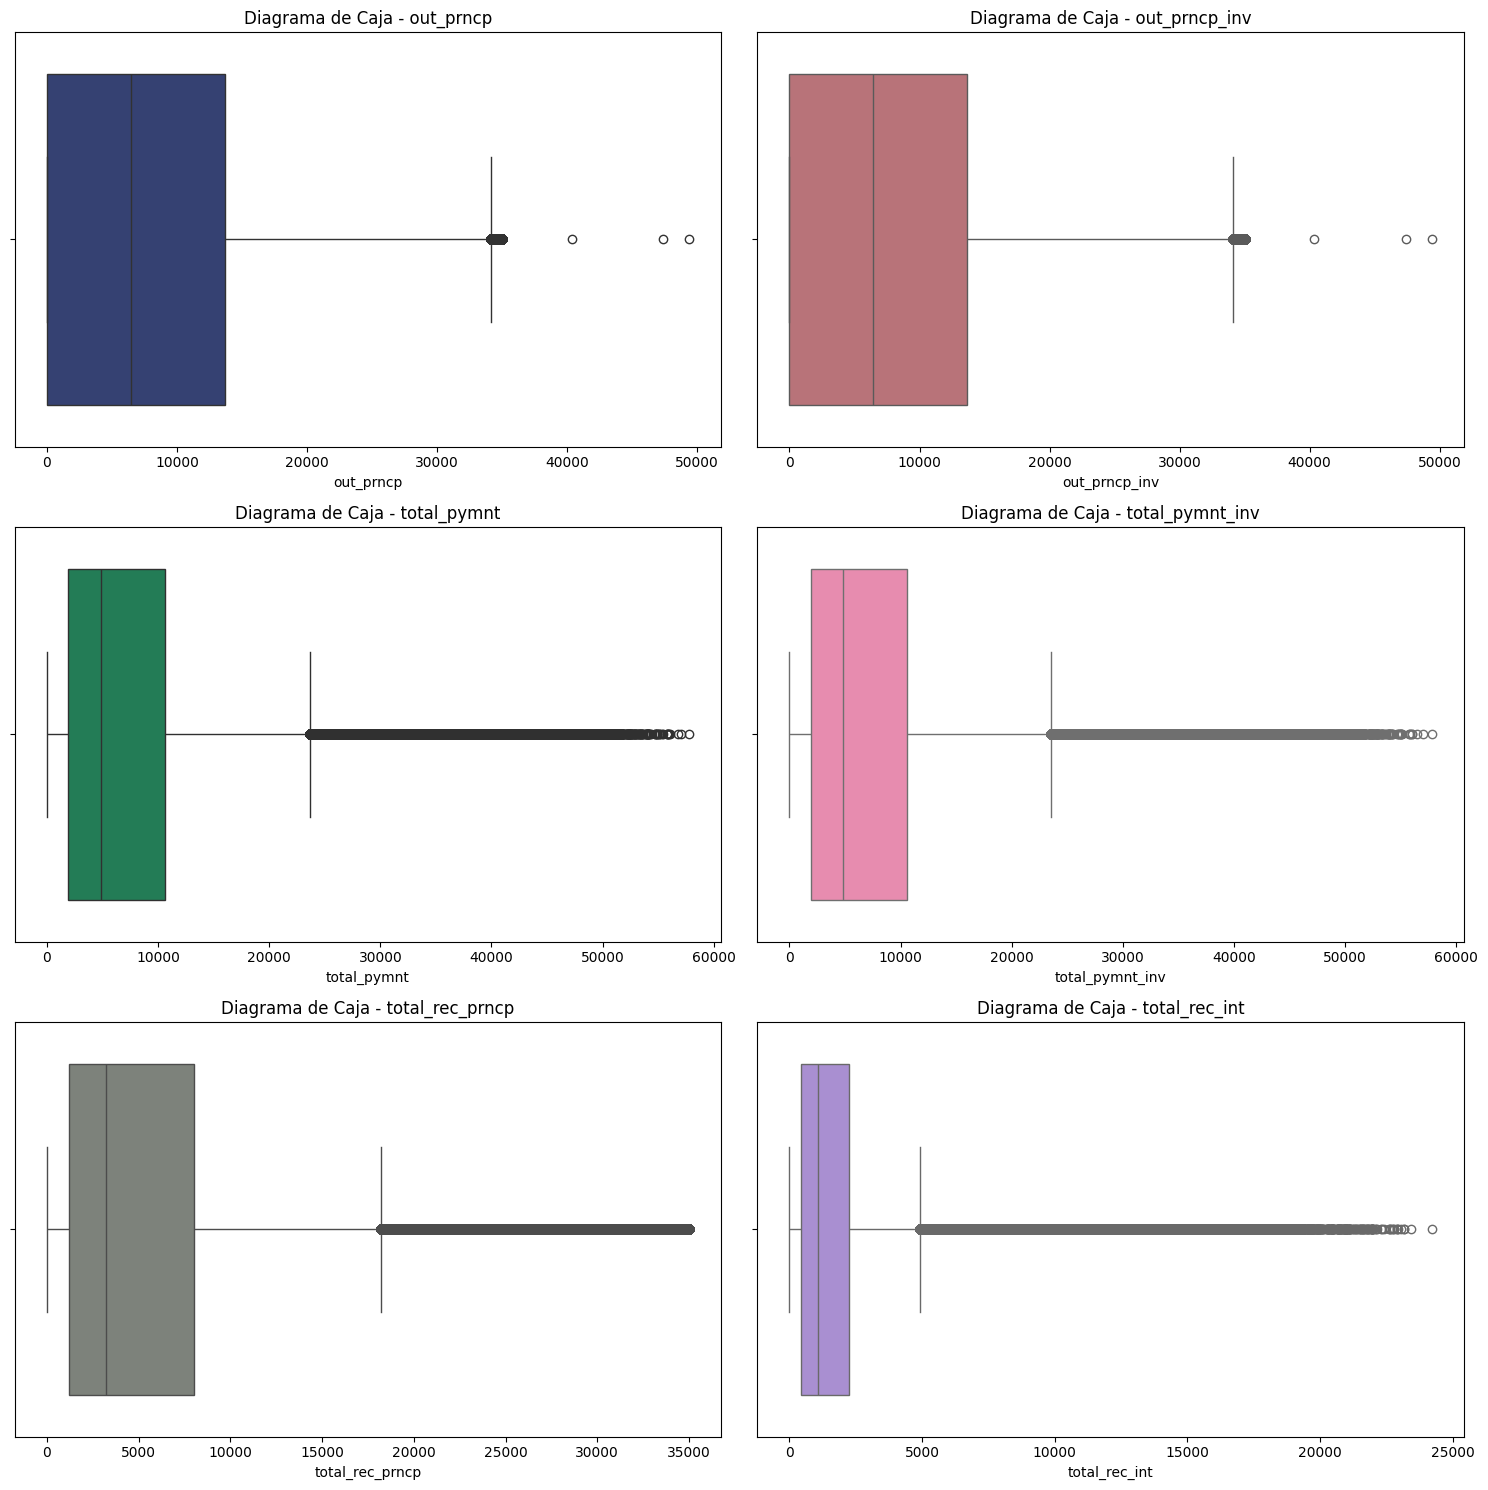

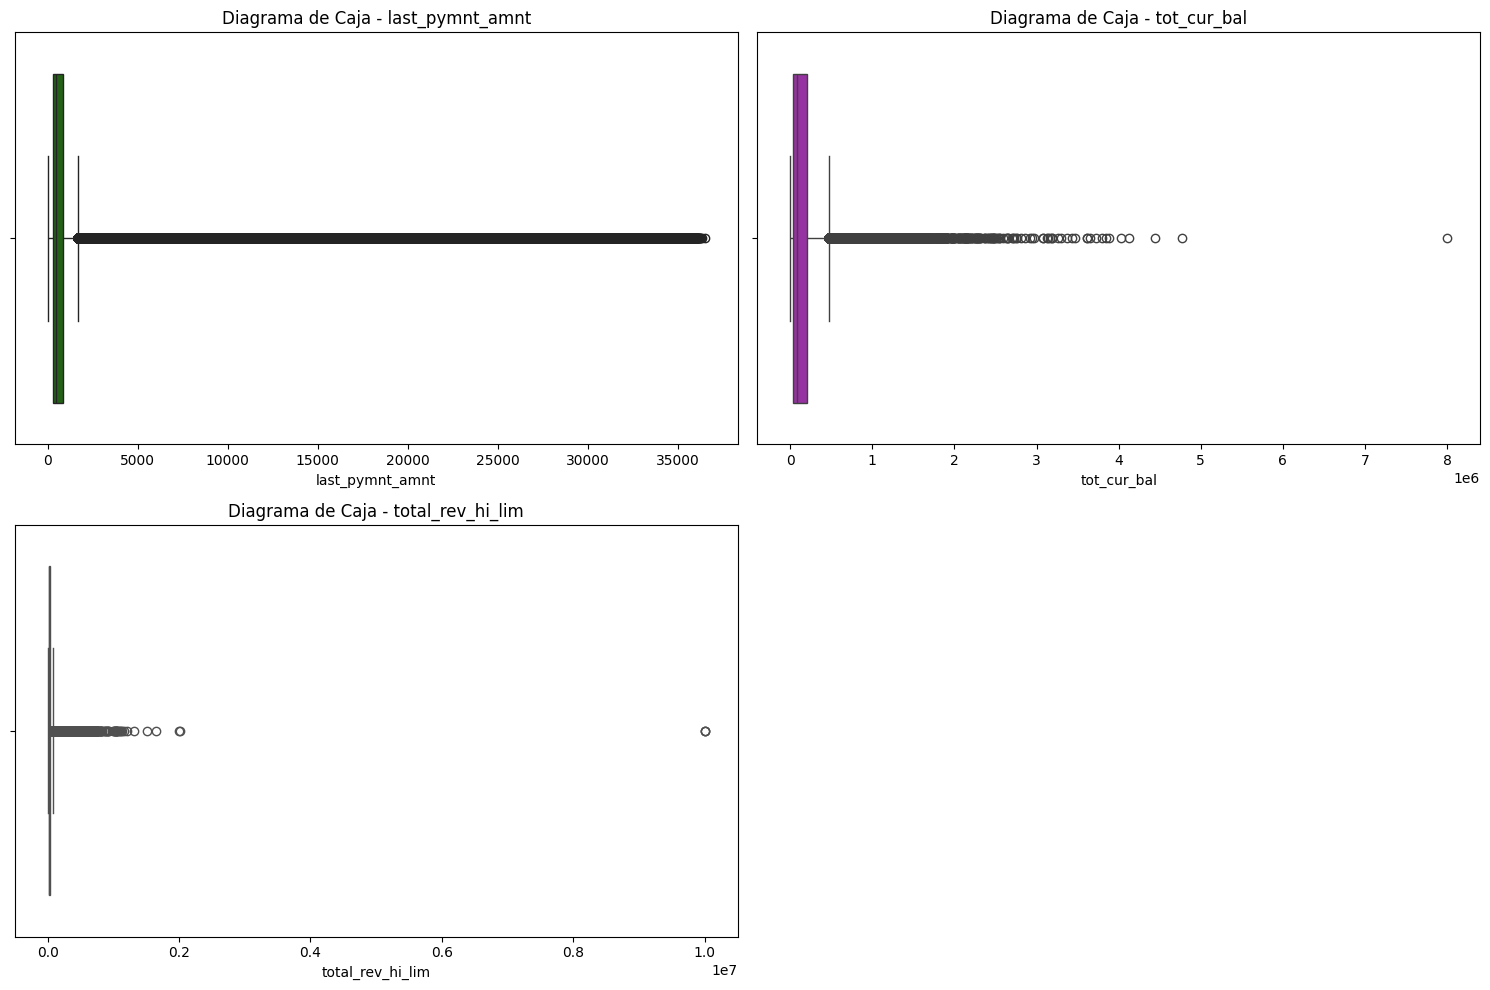

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# Número de diagramas por figura
num_boxplots_por_figura = 6  # Ajustable para dividir en múltiples gráficos

# Filtrar las columnas numéricas
columnas_numericas = df.select_dtypes(include=['number']).columns.tolist()

# Iterar en lotes de variables numéricas
for i in range(0, len(columnas_numericas), num_boxplots_por_figura):
    columnas_subset = columnas_numericas[i:i + num_boxplots_por_figura]

    # Calcular filas necesarias (dos columnas por fila)
    num_filas = math.ceil(len(columnas_subset) / 2)

    # Crear la figura con 2 columnas
    fig, axes = plt.subplots(nrows=num_filas, ncols=2, figsize=(15, 5 * num_filas))

    # Asegurar que siempre tengamos una lista de ejes (en caso de 1 fila)
    axes = axes.flatten() if num_filas > 1 else np.array([axes]).flatten()

    # Generar los boxplots
    for ax, col in zip(axes, columnas_subset):
        sns.boxplot(data=df, x=col, ax=ax, color=np.random.rand(3,))
        ax.set_title(f'Diagrama de Caja - {col}')
        ax.set_xlabel(col)

    # Eliminar gráficos vacíos si hay menos variables que ejes disponibles
    for j in range(len(columnas_subset), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


<p align="center"><strong>Figura 3:</strong> Diagramas de cajas de las variables numéricas.</p>

<p align="center"><em style="font-size: smaller;">Elaboración propia.</em></p>

In [16]:
# Observamos datos atípicos identificados en los diagramas de caja y bigote en la columna dti
df[df['dti'] > 2000]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,application_type,tot_cur_bal,total_rev_hi_lim
484446,20000.0,20000.0,20000.0,36 months,16.99,712.96,D,D3,NaN,NaN,...,19570.21,19570.21,694.08,694.08,429.79,264.29,712.96,JOINT,8715.0,8100.0
531886,3700.0,3700.0,3700.0,36 months,12.59,123.94,C,C2,NaN,NaN,...,3528.87,3528.87,242.70,242.70,171.13,71.57,123.94,JOINT,24521.0,18700.0


In [17]:
# Eliminamos aquellos registros atípicos
df = df[df['dti'] != 9999]

In [18]:
# Observamos datos atípicos identificados en los diagramas de caja y bigote en la columna revol_util
df[df['revol_util'] > 500]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,application_type,tot_cur_bal,total_rev_hi_lim
406516,3500.0,3500.0,3500.0,36 months,12.49,117.08,B,B4,Budget Analyst,10+ years,...,0.0,0.0,3944.66,3944.66,3500.0,444.66,2422.62,INDIVIDUAL,5668.0,300.0


In [19]:
# Eliminamos aquellos registros atípicos
df = df[df['revol_util'] < 500]

In [20]:
# Observamos datos atípicos identificados en los diagramas de caja y bigote en la columna total_rev_hi_lim
df[df['total_rev_hi_lim'] > 9000000]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,application_type,tot_cur_bal,total_rev_hi_lim
129958,28000.0,28000.0,28000.0,36 months,8.90,889.09,A,A5,Jennison Associates,1 year,...,4351.81,4351.81,27557.23,27557.23,23648.19,3909.04,889.09,INDIVIDUAL,3881449.0,9999999.0
301370,26200.0,26200.0,26200.0,36 months,7.69,817.28,A,A4,Executive,3 years,...,16009.95,16009.95,12259.20,12259.20,10190.05,2069.15,817.28,INDIVIDUAL,3840795.0,9999999.0
755746,35000.0,35000.0,35000.0,36 months,16.55,1240.03,D,D2,CEO,10+ years,...,29474.30,29474.30,8715.95,8715.95,5525.70,3190.25,1240.03,INDIVIDUAL,4447397.0,9999999.0


In [21]:
# Eliminamos aquellos registros atípicos
df = df[df['total_rev_hi_lim'] != 9999999]

<p style="text-align: justify;">
A partir de la identificación de valores atípicos en los diagramas de cajas y bigotes, se eliminan 6 registros que contienen valores atípicos, dos de la variable dti, uno de la variable revol_util y tres de la variable total_rev_hi_lim.
</p>

## Estadísticas de las variables categóricas

<p style="text-align: justify;">
A continuación, se podrán observar las estadísticas descriptivas de las columnas numéricas.
</p>

In [22]:
df[columnas_categoricas].describe()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,title,addr_state,initial_list_status,application_type
count,886871,886871,886871,835445,842063,886871,886871,886871,886871,886871,886719,886871,886871,886871
unique,2,7,35,299101,11,6,3,10,2,14,63064,51,2,2
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,Current,n,debt_consolidation,Debt consolidation,CA,f,INDIVIDUAL
freq,620733,254444,56301,13461,291415,443315,329393,601528,886861,524006,413851,129455,456524,886362


<p align="center"><strong>Tabla 3:</strong> Estadísticas descriptivas de las variables categóricas.</p>

<p align="center"><em style="font-size: smaller;">Elaboración propia.</em></p>

<p style="text-align: justify;">
Se puede observar que las variables "emp_title" y "title" por definición y por conteo de valores únicos no proporcionan información de mayor utilidad, así que se eliminan.
</p>

In [23]:
df = df.drop(columns=["emp_title", "title"], errors="ignore")

In [24]:
columnas_categoricas = [col for col in columnas_categoricas if col not in ["emp_title", "title"]]
columnas_categoricas

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'initial_list_status',
 'application_type']

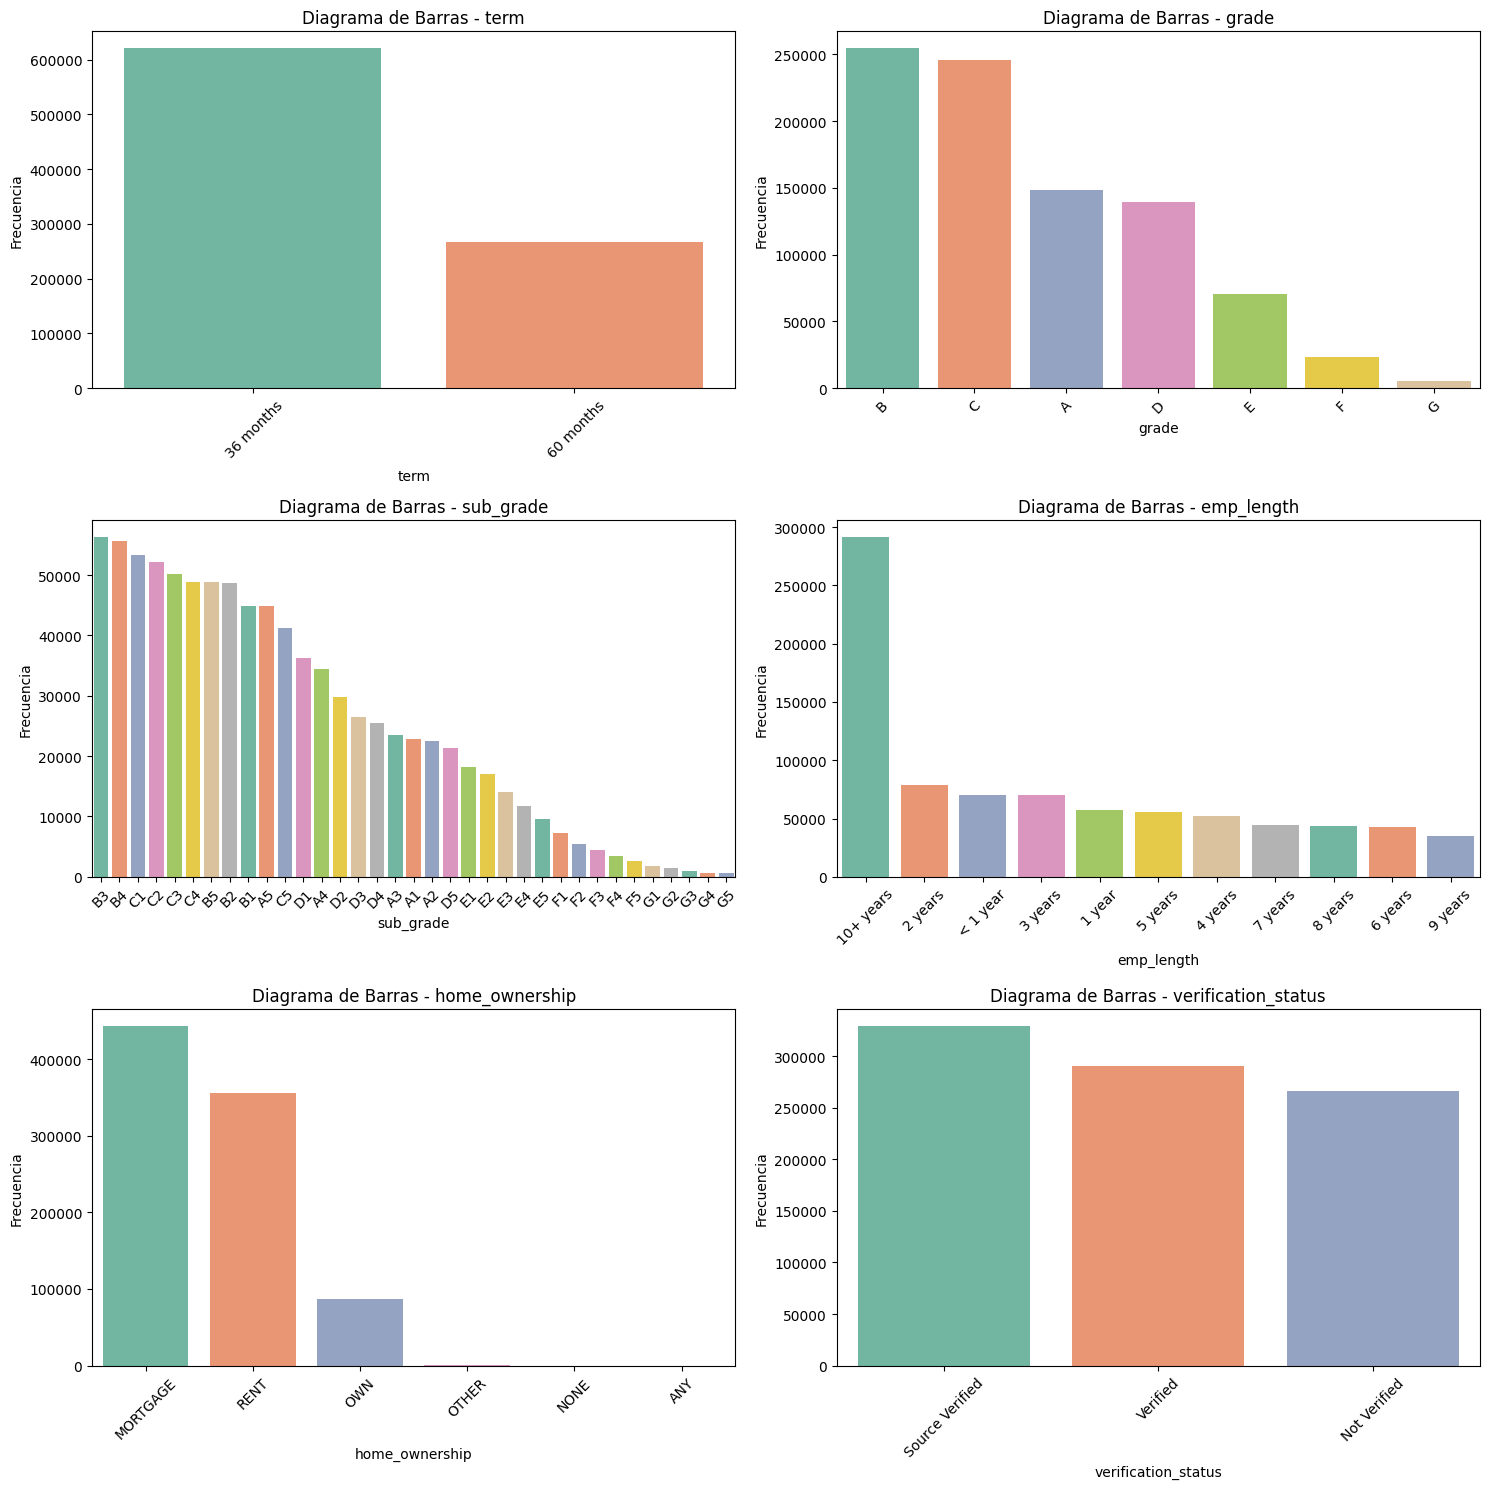

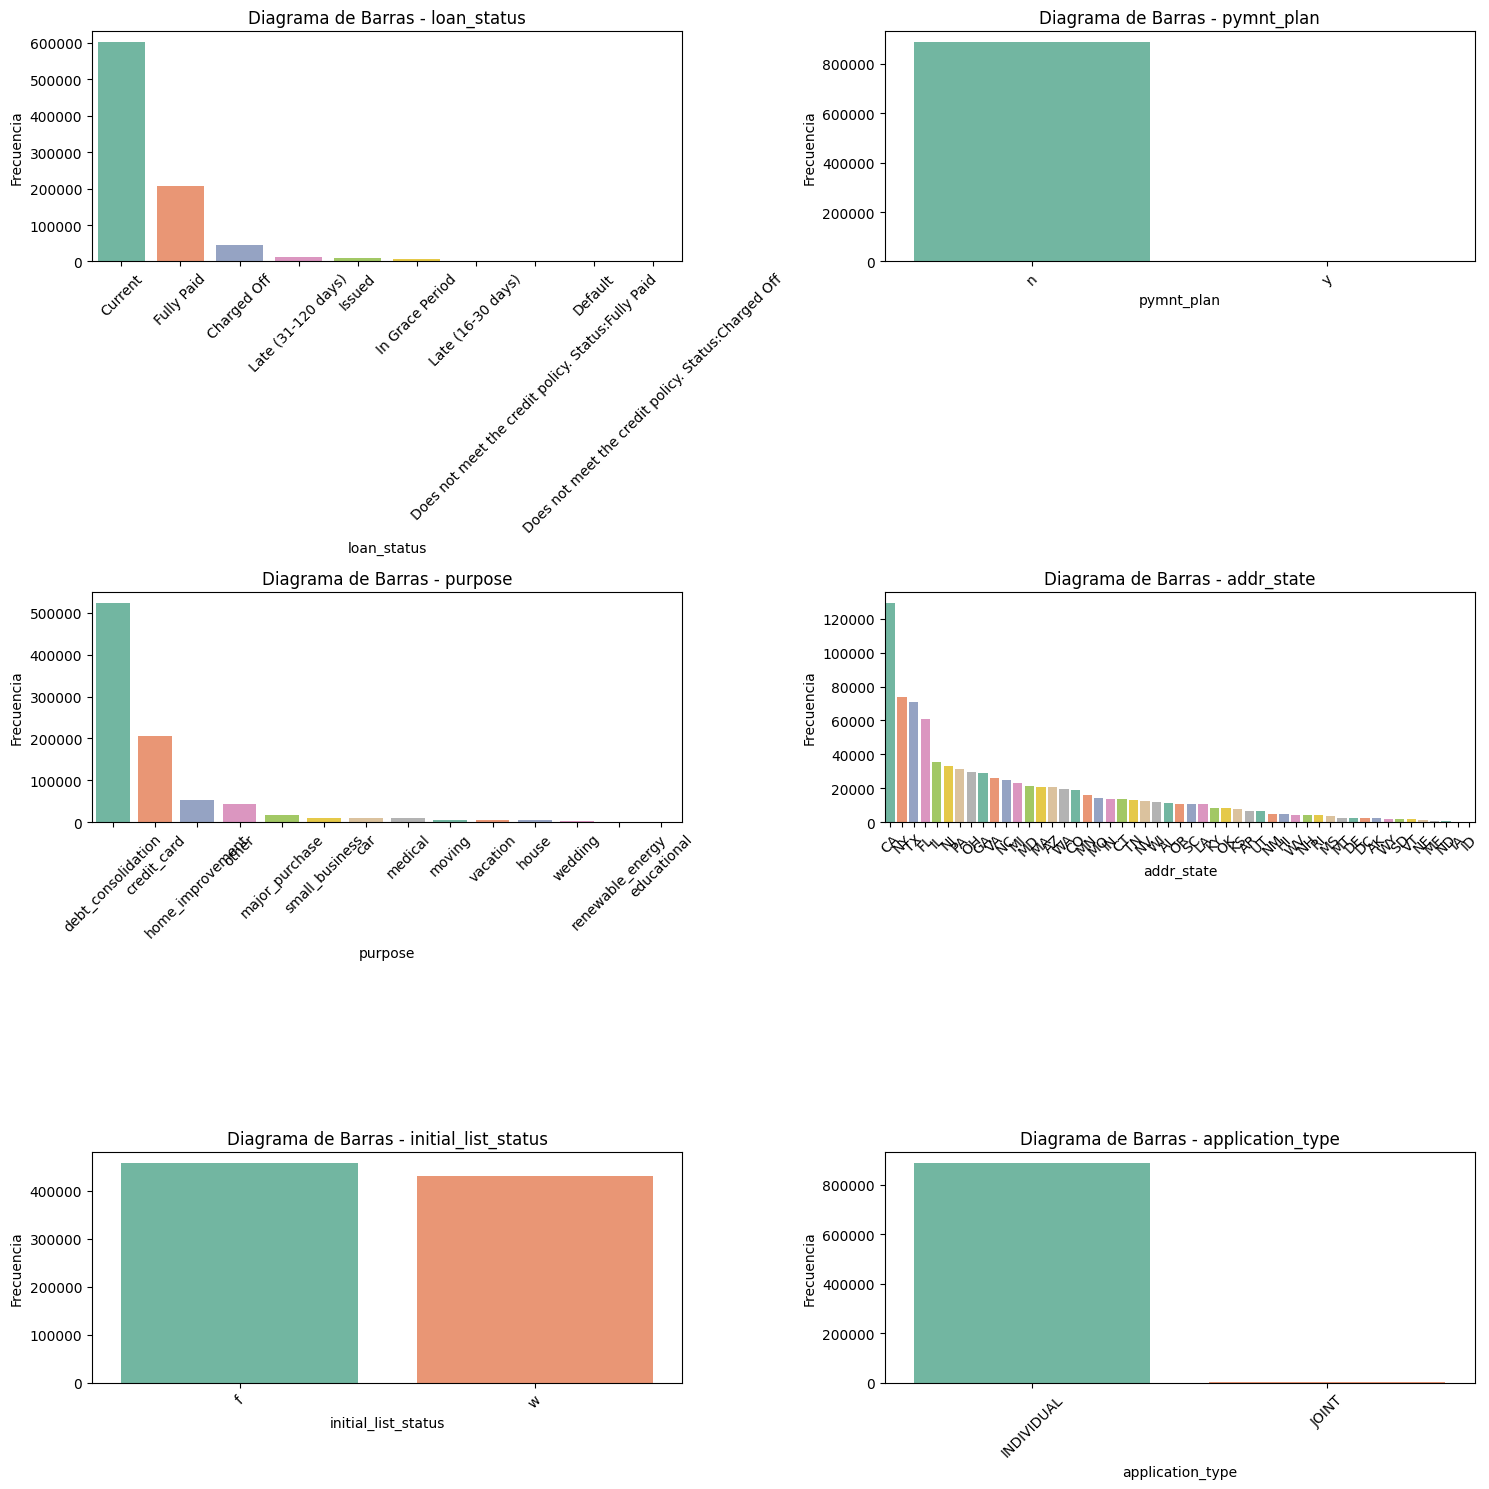

In [25]:
import warnings
import math

# Desactivar warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Número de gráficos por figura
num_barras_por_figura = 6  # Ajustable según la cantidad de variables por visualización

# Elegir una mejor paleta de colores
palette = sns.color_palette("Set2")  # Puedes cambiar a 'deep', 'muted', 'coolwarm', etc.

# Iterar en lotes de variables categóricas
for i in range(0, len(columnas_categoricas), num_barras_por_figura):
    columnas_subset = columnas_categoricas[i:i + num_barras_por_figura]

    # Calcular filas necesarias (dos columnas por fila)
    num_filas = math.ceil(len(columnas_subset) / 2)

    # Crear la figura con 2 columnas
    fig, axes = plt.subplots(nrows=num_filas, ncols=2, figsize=(15, 5 * num_filas))

    # Asegurar que siempre tengamos una lista de ejes (en caso de 1 fila)
    axes = axes.flatten() if num_filas > 1 else np.array([axes]).flatten()

    # Generar los diagramas de barras con mejor paleta de colores
    for ax, col in zip(axes, columnas_subset):
        if df[col].nunique() > 1:  # Evitar warnings cuando hay una sola categoría
            sns.countplot(data=df, x=col, ax=ax, order=df[col].value_counts().index, palette=palette)
            ax.set_title(f'Diagrama de Barras - {col}')
            ax.set_xlabel(col)
            ax.set_ylabel('Frecuencia')
            ax.tick_params(axis='x', rotation=45)  # Rotar etiquetas si son largas
        else:
            ax.set_visible(False)  # Ocultar ejes vacíos si hay una sola categoría

    # Eliminar gráficos vacíos si hay menos variables que ejes disponibles
    for j in range(len(columnas_subset), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()




<p align="center"><strong>Figura 4:</strong> Diagramas de barras de las variables categóricas.</p>

<p align="center"><em style="font-size: smaller;">Elaboración propia.</em></p>

In [26]:
# Realizar conteo distintivo para 'pymnt_plan' y 'application_type'
conteo_pymnt_plan = df['pymnt_plan'].value_counts()
conteo_application_type = df['application_type'].value_counts()

# Crear DataFrame con los resultados
df_conteo = pd.DataFrame({
    "Variable": ["pymnt_plan"] * len(conteo_pymnt_plan) + ["application_type"] * len(conteo_application_type),
    "Valor Único": list(conteo_pymnt_plan.index) + list(conteo_application_type.index),
    "Frecuencia": list(conteo_pymnt_plan.values) + list(conteo_application_type.values)
})

df_conteo

,Variable,Valor Único,Frecuencia
0,pymnt_plan,n,886861
1,pymnt_plan,y,10
2,application_type,INDIVIDUAL,886362
3,application_type,JOINT,509


<p style="text-align: justify;">
Como las variables "pymnt_plan" y "application_type" tienen solo dos categorías, y menos del 0.1% de los registros en una de las mismas, se eliminan.
</p>

In [27]:
df = df.drop(columns=["pymnt_plan", "application_type"], errors="ignore")

## Imputación de nulos

In [28]:
df_nulos = calcular_porcentaje_nulos(df)
print(df_nulos)

                Columna  Porcentaje_Nulos
30     total_rev_hi_lim          7.910395
29          tot_cur_bal          7.910395
8            emp_length          5.052370
3                  term          0.000000
4              int_rate          0.000000
1           funded_amnt          0.000000
0             loan_amnt          0.000000
6                 grade          0.000000
7             sub_grade          0.000000
9        home_ownership          0.000000
10           annual_inc          0.000000
11  verification_status          0.000000
12          loan_status          0.000000
5           installment          0.000000
2       funded_amnt_inv          0.000000
14           addr_state          0.000000
13              purpose          0.000000
15                  dti          0.000000
16       inq_last_6mths          0.000000
19           revol_util          0.000000
20            total_acc          0.000000
17             open_acc          0.000000
18            revol_bal          0

<p style="text-align: justify;">
Después de realizado el pre-procesamiento anterior, al analizar cuántas variables con datos nulos existen, se tienen 3 variables, sin embargo, estas cuentan con un porcentaje de valores nulos menor al 8%, por lo que se realizará la imputación de la mediana para variables numéricas, y de la moda para variables categóricas.
</p>
<p style="text-align: justify;">
Las variables a las cuales se les realiza imputación de nulos son total_rev_hi_lim, tot_cur_bal y emp_length.
</p>

In [29]:
# Imputar valores nulos
# Numéricas: reemplazar por la mediana
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categóricas: reemplazar por la moda
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

## Matriz de correlación

<p style="text-align: justify;">
A través de la matriz de correlación, se pueden observar las variables numéricas que más se correlacionan entre ellas y con esto se pueden eliminar las que tienen este valor mayor, ya que representan redundancias estadísticas para el modelo.
</p>

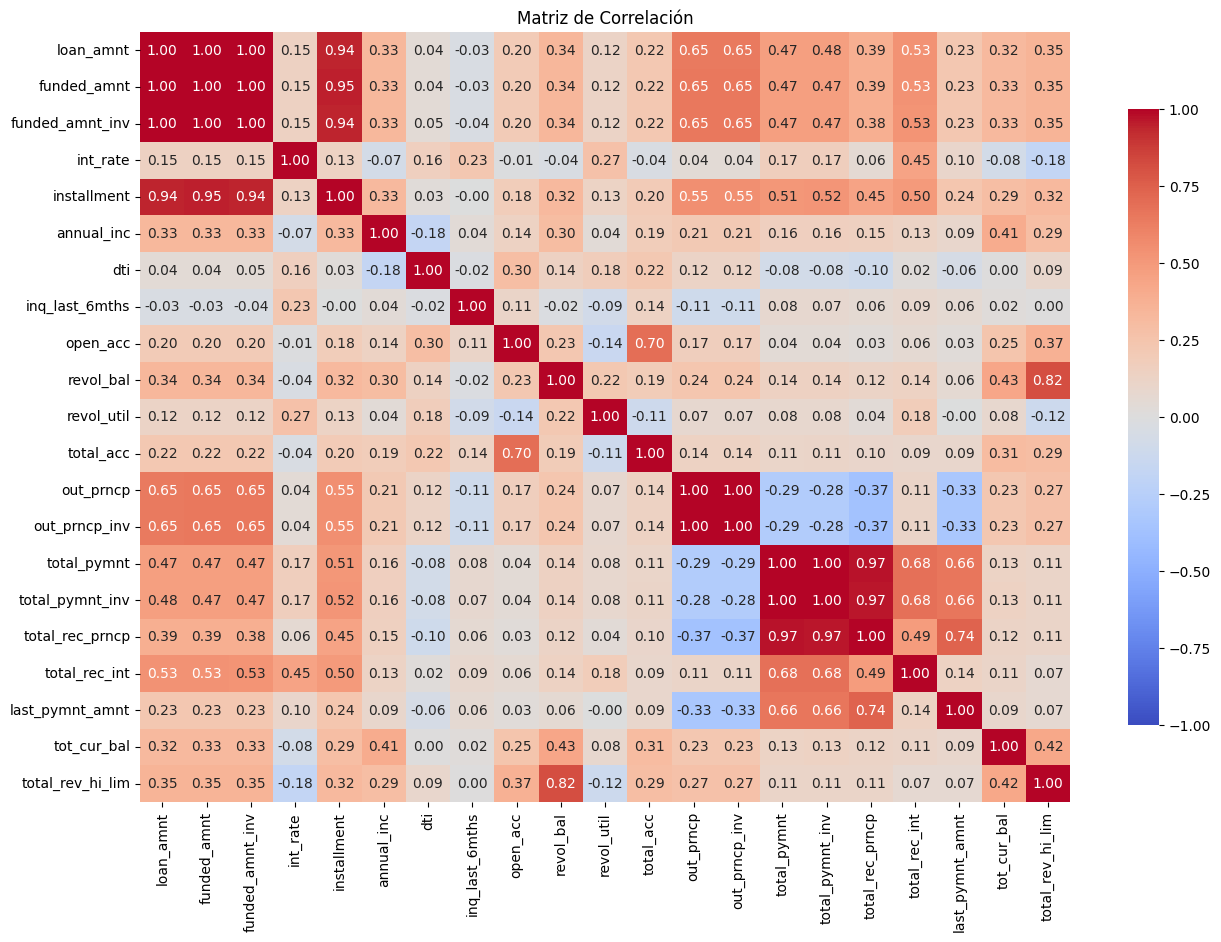

In [30]:
df_correlacion = df.copy()
# Calcular la matriz de correlación
corr = df.select_dtypes(include=[np.number]).corr()

# Configurar la figura de matplotlib
plt.figure(figsize=(15, 10))

# Crear un mapa de calor

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={"shrink": .8})
plt.title("Matriz de Correlación")
plt.show()

<p align="center"><strong>Figura 5:</strong> Matriz de correlación de las variables numéricas.</p>

<p align="center"><em style="font-size: smaller;">Elaboración propia.</em></p>

In [31]:
# Elimitar las variables altamente correlacionadas
# Crear una máscara para el triángulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))
# Seleccionar el triángulo superior de la matriz de correlación
triangulo_superior = corr.where(mask)

# Encontrar las columnas con una correlación mayor a 0.80
columnas_eliminar = [col for col in triangulo_superior.columns if any((triangulo_superior[col] >= 0.80) & (triangulo_superior[col] < 1))]
df = df.drop(columns=columnas_eliminar, errors='ignore')
columnas_eliminar

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rev_hi_lim']

<p style="text-align: justify;">
Se decide eliminar las variables que tengan una correlación mayor o igual a 0.8 con otra variable, siendo así las variables eliminadas 'funded_amnt', 'funded_amnt_inv', 'installment', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp' y 'total_rev_hi_lim'.
</p>
<p style="text-align: justify;">
Ahora bien, existen variables que son de conocimiento del banco, no del cliente, por lo que para funcionalidad de la aplicación final, se eliminan estas variables. Adicionalmente, se eliminan variables redudantes como "sub_grade", o variables relacionadas con fechas, "term" o "emp_length".</p>
<p style="text-align: justify;">
Así, el conjunto final de variables a utilizar es el siguiente:</p>

In [32]:
df_temp = df.copy()
df_temp = df_temp.drop(columns=["term", "emp_length", "sub_grade", "verification_status", "addr_state", "dti","inq_last_6mths", "revol_util", "initial_list_status"])
df_temp

,loan_amnt,int_rate,grade,home_ownership,annual_inc,loan_status,purpose,open_acc,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_int,last_pymnt_amnt,tot_cur_bal
0,5000.0,10.65,B,RENT,24000.0,Fully Paid,credit_card,3.0,13648.0,9.0,0.00,5861.071414,861.07,171.62,80537.0
1,2500.0,15.27,C,RENT,30000.0,Charged Off,car,3.0,1687.0,4.0,0.00,1008.710000,435.17,119.66,80537.0
2,2400.0,15.96,C,RENT,12252.0,Fully Paid,small_business,2.0,2956.0,10.0,0.00,3003.653644,603.65,649.91,80537.0
3,10000.0,13.49,C,RENT,49200.0,Fully Paid,other,10.0,5598.0,37.0,0.00,12226.302212,2209.33,357.48,80537.0
4,3000.0,12.69,B,RENT,80000.0,Current,other,15.0,27783.0,38.0,766.90,3242.170000,1009.07,67.79,80537.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,10000.0,11.99,B,RENT,31000.0,Current,debt_consolidation,9.0,14037.0,15.0,7055.47,3971.880000,1027.35,332.10,25274.0
887375,24000.0,11.99,B,MORTGAGE,79000.0,Current,home_improvement,5.0,8621.0,23.0,16933.26,9532.390000,2465.65,797.03,140285.0
887376,13000.0,15.99,D,RENT,35000.0,Current,debt_consolidation,9.0,11031.0,22.0,11155.50,3769.740000,1925.24,316.07,34178.0
887377,12000.0,19.99,E,RENT,64400.0,Current,debt_consolidation,17.0,8254.0,20.0,10447.31,3787.670000,2234.98,317.86,58418.0


In [33]:
df = df_temp.copy()
df_info = pd.DataFrame({
    "Column": df.dtypes.index,
    "Data Type": df.dtypes.values
})
df_info

,Column,Data Type
0,loan_amnt,float64
1,int_rate,float64
2,grade,object
3,home_ownership,object
4,annual_inc,float64
5,loan_status,object
6,purpose,object
7,open_acc,float64
8,revol_bal,float64
9,total_acc,float64


<p align="center"><strong>Tabla 4:</strong> Conjunto final de variables elegidas para el modelo.</p>

<p align="center"><em style="font-size: smaller;">Elaboración propia.</em></p>

In [34]:
# Para garantizar consistencia en la base de datos, realizamos una copia sobre la misma
df = df.copy()

## Variable Objetivo

<p style="text-align: justify;">
Para realizar las transformaciones necesarias de la variable objetivo para los modelos, primero se realiza un conteo de valores únicos de esta columna para obtener información de la misma.
</p>

In [35]:
# Obtener el conteo de valores únicos en 'loan_status'
conteo_loan_status = df['loan_status'].value_counts().reset_index()

# Renombrar las columnas para mayor claridad
conteo_loan_status.columns = ['Valor Único', 'Frecuencia']

conteo_loan_status

,Valor Único,Frecuencia
0,Current,601528
1,Fully Paid,207570
2,Charged Off,45201
3,Late (31-120 days),11582
4,Issued,8457
5,In Grace Period,6251
6,Late (16-30 days),2355
7,Does not meet the credit policy. Status:Fully ...,1954
8,Default,1218
9,Does not meet the credit policy. Status:Charge...,755


<p align="center"><strong>Tabla 5:</strong> Conteo de valores únicos de la variable 'loan_status'.</p>

<p align="center"><em style="font-size: smaller;">Elaboración propia.</em></p>

<p style="text-align: justify;">
Se puede observar que existen 10 categorías en esta clase, sin embargo, para la naturaleza del problema, la variable objetivo es conveniente realizar una transformación binaria, donde 0 serían aquellos registros correspondientes a una situación crediticia al día, que pagaron su crédito, mientras que 1 corresponderían a aquellos que no.
</p>

<p style="text-align: justify;">
Para la naturaleza del problema, existen unos valores que aportan información, mientras otros valores no lo hacen.</p>

<strong>No aportan información:</strong>

- <strong>Current:</strong> Estos clientes están al día. No sabemos si tuvieron atrasos y ya se normalizaron o si van a incumplir en el futuro. Solo sabemos que están al día, por lo tanto, no se tienen en cuenta.

- <strong>Late (16-30 days):</strong> Estos clientes tienen un atraso entre 16 y 30 días. No sabemos cómo se comportarán, por lo tanto, no se tienen en cuenta.

- <strong>Issued:</strong> Son aquellos donde el crédito apenas se aprobó. Esta categoría no dice nada para el problema, por lo tanto, no se tiene en cuenta.

- <strong>In Grace Period:</strong> Esos créditos están en periodo de gracia, así que aún los acreditados no están obligados a hacer pagos, por lo que al no saber cómo van a comportarse cuando se acabe el periodo de gracia, no se tienen en cuenta.

<strong>Son buenos pagadores:</strong>

- <strong>Fully paid:</strong> Estos clientes ya pagaron sus créditos, se sabe que son buenos pagadores, por lo que es un 0.

- <strong>Does not meet the credit policy. Status:Fully Paid:</strong> Este crédito se pagó en su totalidad, por lo que es un 0.

<strong>Son malos pagadores:</strong>

- <strong>Default:</strong> Esto es impago, se sabe que son malos, por lo que es un 1.

- <strong>Does not meet the credit policy. Status:Charged Off:</strong> Este crédito no se pagó, por lo que es un 1. 

- <strong>Charged off:</strong> Son créditos que los otorgantes ya han reconocido como incobrables y los asumen perdidos, por lo que es un 1.

- <strong>Late (31-120):</strong> Estos son créditos que tienen un atraso entre los 31 y los 120 días, por lo que es un 1.

In [36]:
# Convertir la variable objetivo en binaria
status_mapping = {
    "Fully Paid": 0,
    "Current": np.nan,
    "Charged Off": 1,
    "Default": 1,
    "Late (31-120 days)": 1,
    "Late (16-30 days)": np.nan,
    "In Grace Period": np.nan,
    "Does not meet the credit policy. Status:Fully Paid": 0,
    "Does not meet the credit policy. Status:Charged Off": 1,
    "Issued": np.nan
}
df['loan_status'] = df['loan_status'].map(status_mapping)

In [37]:
# Convertir el conteo de valores únicos en 'loan_status' a un DataFrame
conteo_loan_status = df['loan_status'].value_counts().reset_index()

# Renombrar las columnas para mayor claridad
conteo_loan_status.columns = ['Valor Único', 'Frecuencia']

conteo_loan_status

,Valor Único,Frecuencia
0,0.0,209524
1,1.0,58756


<p align="center"><strong>Tabla 6:</strong> Conteo de valores únicos de la variable 'loan_status' codificados.</p>

<p align="center"><em style="font-size: smaller;">Elaboración propia.</em></p>

In [38]:
# Eliminamos filas donde 'loan_status' es nulo
df = df.dropna(subset=['loan_status'])
df_unbalanced = df.copy() # Guardar una copia del DataFrame desbalanceado (Mouse-herramienta que nos servirá para más adelante)

## Balanceo de los datos

<p style="text-align: justify;">
El valor de '0' de la variable objetivo es significativamente más alto que el valor '1', así que para evitar sesgos en el modelo y errores en el entrenamiento, es necesario realizar el balanceo de los datos, seleccionando una muestra aleatoria entre los registros con valor '0' del mismo tamaño que los datos con valor '1'. Así, el dataset cuenta con <strong>58756</strong> registros cuyo valor en 'loan_status' es '0' y <strong>58756</strong> registros cuyo valor en 'loan_status' es '1'.
</p>

In [39]:
# Seleccionar los registros con 'loan_status' por valor
df_paid = df[df['loan_status'] == 0]
df_nopaid = df[df['loan_status'] == 1]

# Seleccionar una muestra aleatoria de 'df_paid' del mismo tamaño que 'df_nopaid'

df_paid = df_paid.sample(n=df_nopaid.shape[0], random_state=42)

# Concatenar 'df_nopaid' y 'df_paid'
df_balanceado = pd.concat([df_nopaid, df_paid], axis=0)

# Mezclar los datos
df_balanceado = df_balanceado.sample(frac=1, random_state=42).reset_index(drop=True)

# Verificar el balance de la variable objetivo
df_balanceado['loan_status'].value_counts()

loan_status
1.0    58756
0.0    58756
Name: count, dtype: int64

In [40]:
df['loan_status'].dtype

dtype('float64')

In [41]:
# Convertimos la columna a int64
df['loan_status'] = df['loan_status'].astype('int64')
df['loan_status'].dtype

dtype('int64')

In [42]:
df = df_balanceado.copy()

## Codificación de variables

<p style="text-align: justify;">
Para trabajar con cualquier modelo, es necesario realizar una transformación a las variables de entrada al modelo llamada <strong>normalización</strong>, con el fin de convertir los datos en valores entre 0 y 1 y así el modelo pueda realizar predicciones de forma correcta. </p>
<p style="text-align: justify;">
Para las variables numéricas, se aplica la normalización <strong>MinMaxScaler</strong>, la cual es una técnica de normalización que reescala los valores numéricos dentro de un rango específico, generalmente entre 0 y 1. Cuenta con la siguiente fórmula:
</p>

$$
\begin{equation}
X_{esc} = \frac{X - X_{min}}{X_{max} - X_{min}}   
\end{equation}
$$

donde:
- $X$ es el valor original,
- $X_{min}$ es el valor mínimo de la variable,
- $X_{max}$ es el valor máximo de la variable.

<p style="text-align: justify;">
Para las variables categóricas, se aplica la normalización <strong>One-Hot</strong>, el cual es un método para convertir variables categóricas en una representación numérica que los algoritmos de Machine Learning pueden procesar. Se crea una nueva columna para cada categoría única de la variable original, asignando un 1 si la muestra pertenece a esa categoría y un 0 en caso contrario. 
</p>

### Variables categóricas

In [43]:
# Columnas con variables categóricas
categorical_columns =   df.select_dtypes(include=['object']).columns

# Aplicar codificación
df = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

### Variables numéricas

In [44]:
from sklearn.preprocessing import MinMaxScaler

# Escalar entre 0 y 1
scaler = MinMaxScaler()
scaled_columns = df.select_dtypes(include=['float64']).columns
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

### Dividir los datos en conjuntos de entrenamiento y prueba

In [45]:
# Normalizar los datos
features = df.drop("loan_status", axis=1)
labels = df["loan_status"]
features = scaler.fit_transform(features)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42, stratify=labels)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((94009, 38), (23503, 38), (94009,), (23503,))

# Entrenamiento y Selección del Modelo

## Modelos de ML

### Regresión Logística

El primer modelo a evaluar es el modelo de Regresión Logística.

In [47]:
# Escalado de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [49]:
# Predicciones
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [50]:
# Importaciones necesarias
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [51]:
# Imprimir métricas
print(f"Exactitud: {accuracy:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")
print("Matriz de Confusión:")
print(conf_matrix)
print("Informe de Clasificación:")
print(report)

Exactitud: 0.9880
AUC-ROC: 0.9978
Matriz de Confusión:
[[11711    41]
 [  242 11509]]
Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     11752
         1.0       1.00      0.98      0.99     11751

    accuracy                           0.99     23503
   macro avg       0.99      0.99      0.99     23503
weighted avg       0.99      0.99      0.99     23503



### Random Forest

Se implementa un modelo de Random Forest con el objetivo de evaluar su capacidad de clasificación de la viabilidad de clientes para la concesión de préstamos.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [53]:
# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Al implementar el modelo se obtuvieron los siguientes resultados:

In [54]:
# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase 1

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Mostrar el reporte de clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.9836
ROC AUC: 0.9981

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     11752
         1.0       0.99      0.98      0.98     11751

    accuracy                           0.98     23503
   macro avg       0.98      0.98      0.98     23503
weighted avg       0.98      0.98      0.98     23503


Confusion Matrix:
[[11652   100]
 [  286 11465]]


Accuracy
El accuracy del modelo es 0.9836, lo que indica que el modelo predice correctamente el estado del préstamo (viable o no viable) en un 98.36% de los casos. Esto es un resultado muy alto y sugiere que el modelo tiene un rendimiento excelente en general.

Classification Report
El informe de clasificación muestra las métricas de precisión, recall y F1-score para cada clase:

Clientes viables(Clase 0):

- Precisión: 0.98, significa que el 98% de los clientes que el modelo predijo como viables realmente son viables.

- Recall: 0.99, indica que el modelo identificó correctamente el 99% de los clientes viables.

- F1-score: 0.98, combinación que equilibra precisión y recall, y también es muy alta.

Clientes no viables(Clase 1):

- Precision: 0.99, significa que el 99% de los clientes que el modelo predijo como no viables realmente son no viables.

- Recall: 0.98, indica que el modelo identificó correctamente el 98% de los clientes no viables.

- F1-score: 0.98, también es muy alta, lo que sugiere un equilibrio adecuado entre precisión y recall.

Matriz de confusión:

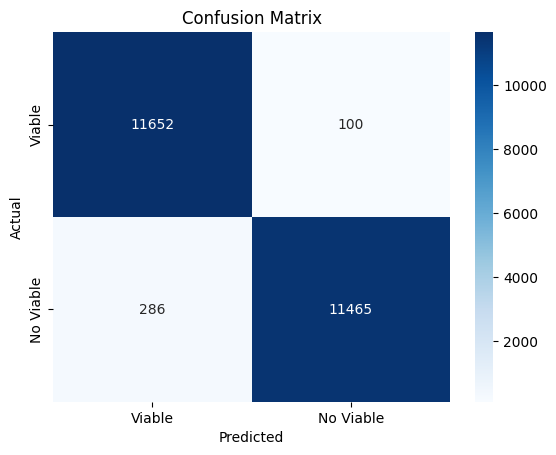

In [55]:
# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Viable', 'No Viable'], yticklabels=['Viable', 'No Viable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

La matriz de confusión muestra los siguientes resultados:

- Verdaderos positivos (TP): 11652 clientes viables fueron correctamente identificados como viables.

- Falsos negativos (FN): 100 clientes viables fueron incorrectamente identificados como no viables.

- Falsos positivos (FP): 286 clientes no viables fueron incorrectamente identificados como viables.

- Verdaderos negativos (TN): 11465 clientes no viables fueron correctamente identificados como no viables.

Curva ROC

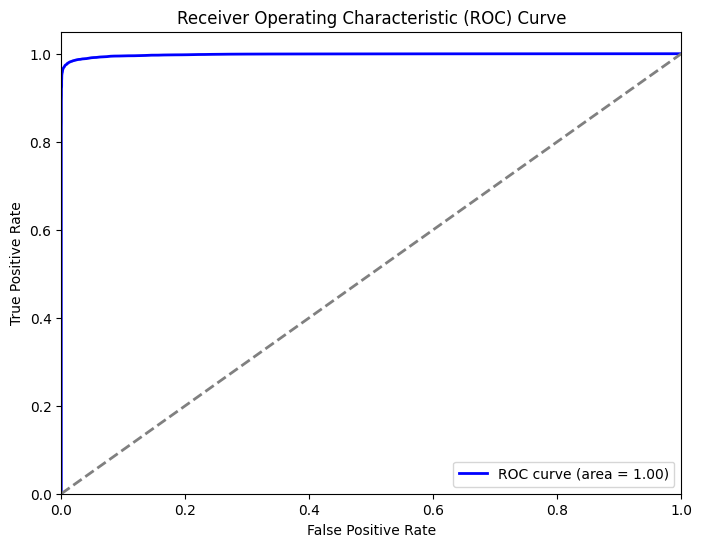

In [56]:
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

El ROC AUC es 0.9981, lo que es prácticamente perfecto ya que un valor cercano a 1 indica que el modelo tiene una capacidad de discriminación muy alta entre las dos clases viables y no viables, esto significa que el modelo puede distinguir muy bien entre los clientes viables y no viables para el préstamo.

Importancia de las características del modelo

In [57]:
import pandas as pd

column_names = df.columns[:-1]  # Excluyendo la columna de la variable objetivo

# Verificamos que X_train es un array de NumPy
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=column_names)

# Verificamos que X_test es un array de NumPy
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=column_names)

# Verificamos el tipo de X_train y X_test
print(type(X_train))
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [58]:
import matplotlib.pyplot as plt

# Obtener la importancia de las características desde el modelo
importances = rf_model.feature_importances_
feature_names = X_train.columns  # X_train es un DataFrame, tiene el atributo 'columns'

# Crear un DataFrame para visualizar la importancia de las características
importance_df = pd.DataFrame({'Característica': feature_names, 'Importancia': importances})
importance_df = importance_df.sort_values(by='Importancia', ascending=False)
importance_df

,Característica,Importancia
9,total_rec_int,4.269343e-01
7,out_prncp,2.289763e-01
0,loan_amnt,9.523790e-02
8,total_pymnt,5.365196e-02
6,total_acc,4.897143e-02
1,int_rate,3.633435e-02
4,open_acc,1.552903e-02
11,tot_cur_bal,1.522950e-02
10,last_pymnt_amnt,1.488039e-02
2,annual_inc,1.410285e-02


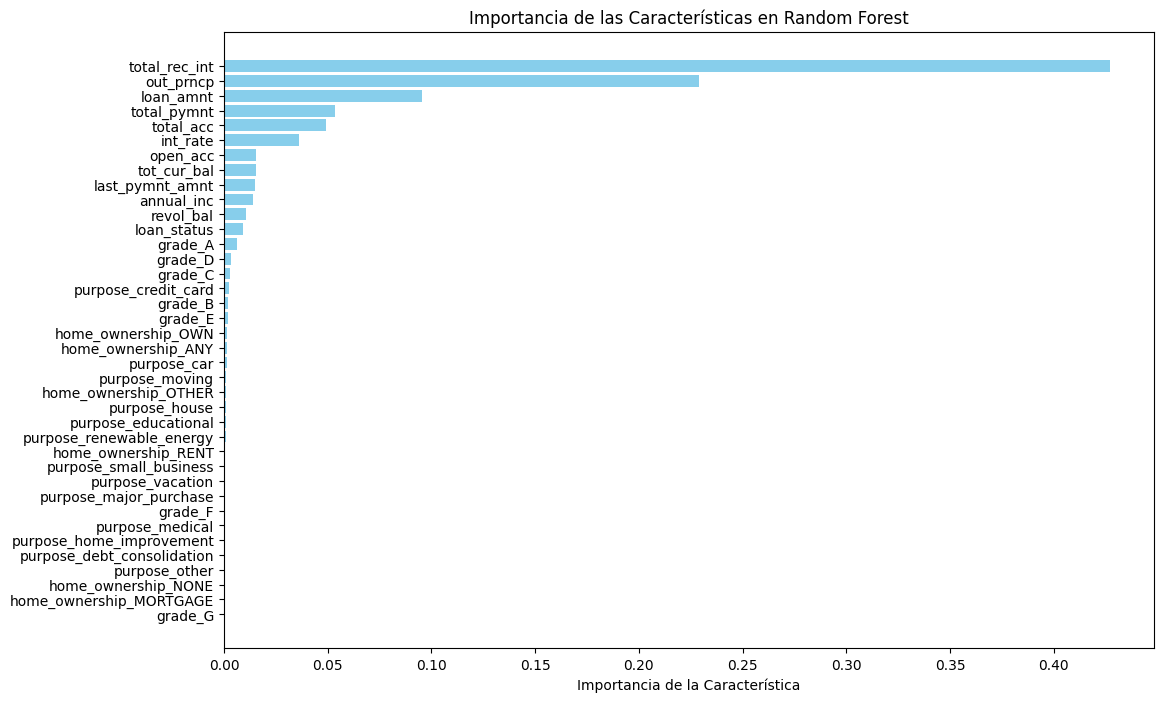

In [59]:




# Visualizar la importancia de las características
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Característica'], importance_df['Importancia'], color='skyblue')
plt.xlabel('Importancia de la Característica')
plt.title('Importancia de las Características en Random Forest')
plt.gca().invert_yaxis() 
plt.show()

Variables Dominantes:

- total_rec_int (Interés total recibido): Esta variable tiene la mayor importancia en el modelo (0.4269), lo que sugiere que el monto total de interés recibido por el banco es un factor crítico para determinar la viabilidad de un cliente, un alto interés recibido puede indicar una mejor gestión del préstamo y un menor riesgo de incumplimiento.

- out_prncp (Principio pendiente): La segunda variable más importante (0.2290) es el monto pendiente del principio del préstamo. Un valor alto en esta variable puede indicar un mayor riesgo, ya que el cliente aún debe una cantidad significativa del préstamo original.

Importancia de Montos y Tasas:

- loan_amnt (Monto del préstamo): Con una importancia de 0.0952, el monto original del préstamo es un factor relevante, un préstamo más grande puede implicar un mayor riesgo, pero también puede estar relacionado con la capacidad crediticia del cliente.

- int_rate (Tasa de interés): La tasa de interés del préstamo (importancia 0.0363) también influye en la viabilidad del cliente. Una tasa de interés alta puede indicar un mayor riesgo crediticio.

Historial de Crédito y Cuentas:

- total_pymnt (Pago total): El monto total pagado por el cliente (0.0537) es un indicador importante de su capacidad para cumplir con las obligaciones.

- total_acc (Número total de cuentas): El número total de cuentas crediticias del cliente (0.0490) puede reflejar su experiencia crediticia y capacidad de gestión financiera.

- open_acc (Número de cuentas abiertas): Las cuentas abiertas (0.0155) también influyen en la decisión, aunque en menor medida.

Balance y Pagos Recientes:

- tot_cur_bal (Balance actual total): El balance actual de todas las cuentas del cliente (0.0152) puede afectar la decisión, ya que un alto balance puede indicar una mayor carga financiera.

- last_pymnt_amnt (Último pago): El monto del último pago (0.0149) puede ser un indicador de la capacidad actual del cliente para cumplir con sus obligaciones.

-  annual_inc (Ingreso anual): El ingreso anual del cliente (0.0141) es un factor relevante, aunque menos importante que otras variables, un ingreso más alto puede mejorar la viabilidad del cliente.

- revol_bal (Balance rotativo): El balance rotativo (0.0104) es el menos importante de las variables principales, pero aún así contribuye a la evaluación del riesgo.

- Las demás variables aportan menos del 1% al modelo

Conclusiones modelo Random Forest:

1. Rendimiento excelente: El modelo tiene un rendimiento casi perfecto en términos de precisión, recall y F1-score para ambas clases, indicando que el modelo es muy confiable para predecir la viabilidad de los clientes para el préstamo.

2. Equilibrio entre clases: El modelo no muestra un sesgo hacia ninguna de las clases ya que tanto la precisión como el recall son altos para ambas clases, lo que indica que el modelo es robusto y no favorece a una clase sobre la otra.

3. Muy pocos errores: Aunque hay algunos errores: 100 falsos negativos y 286 falsos positivos, estos son relativamente pocos en comparación con el total de casos 23,503 lo cual es especialmente importante en un contexto financiero, donde los errores pueden tener un impacto significativo.

4. Capacidad de generalización: El alto ROC AUC sugiere que el modelo tiene una capacidad de generalización muy buena y puede ser aplicado a nuevos datos con alta confianza.

## Modelo de Redes de Neuronales

A continuación, se implementa un modelo de Redes Neuronales.

In [60]:

# Normalizar los datos
features = df.drop("loan_status", axis=1)
labels = df["loan_status"]
features = scaler.fit_transform(features)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42, stratify=labels)
# Definir el modelo base
def build_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(features.shape[1],)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')  # Para clasificación binaria
    ])
    return model

In [61]:
# Entrenamiento con SGD
model_sgd = build_model()

model_sgd.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)


### Comparación de Optimizadores

In [62]:
# Definir diccionario para almacenar los historiales de entrenamiento
histories = {}
optimizers = {
    "SGD": SGD(learning_rate=0.01),
    "SGD + Momentum": SGD(learning_rate=0.01, momentum=0.9),
    "RMSProp": RMSprop(learning_rate=0.001),
    "Adam": Adam(learning_rate=0.001)
}

# Entrenamiento de modelos con diferentes optimizadores
for name, opt in optimizers.items():
    print(f"Entrenando con {name}...")
    model = build_model()
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
    
    history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test),
                        callbacks=[early_stopping, reduce_lr], verbose=1)
    histories[name] = history



Entrenando con SGD...
Epoch 1/50
735/735 [==============================] - 4s 4ms/step - loss: 0.5389 - accuracy: 0.7247 - val_loss: 0.2805 - val_accuracy: 0.9001 - lr: 0.0100
Epoch 2/50
735/735 [==============================] - 3s 4ms/step - loss: 0.2759 - accuracy: 0.8835 - val_loss: 0.1286 - val_accuracy: 0.9597 - lr: 0.0100
Epoch 3/50
735/735 [==============================] - 3s 4ms/step - loss: 0.1806 - accuracy: 0.9276 - val_loss: 0.0946 - val_accuracy: 0.9680 - lr: 0.0100
Epoch 4/50
735/735 [==============================] - 2s 3ms/step - loss: 0.1420 - accuracy: 0.9454 - val_loss: 0.0733 - val_accuracy: 0.9776 - lr: 0.0100
Epoch 5/50
735/735 [==============================] - 2s 3ms/step - loss: 0.1165 - accuracy: 0.9574 - val_loss: 0.0563 - val_accuracy: 0.9823 - lr: 0.0100
Epoch 6/50
735/735 [==============================] - 2s 3ms/step - loss: 0.1029 - accuracy: 0.9632 - val_loss: 0.0520 - val_accuracy: 0.9845 - lr: 0.0100
Epoch 7/50
735/735 [============================

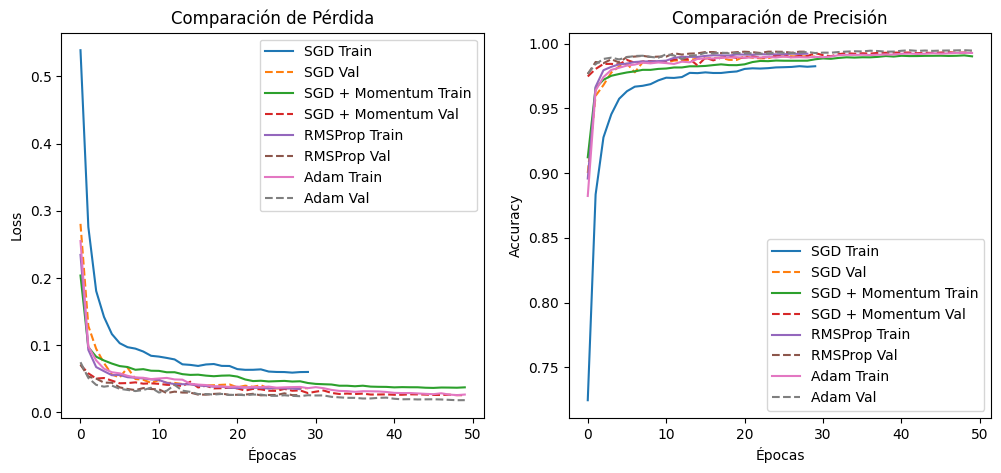

In [63]:
# Comparación de loss y accuracy
plt.figure(figsize=(12, 5))

# Comparar la pérdida
plt.subplot(1, 2, 1)
for name, history in histories.items():
    plt.plot(history.history['loss'], label=f'{name} Train')
    plt.plot(history.history['val_loss'], linestyle='dashed', label=f'{name} Val')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Comparación de Pérdida')
plt.legend()

# Comparar la precisión
plt.subplot(1, 2, 2)
for name, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'{name} Train')
    plt.plot(history.history['val_accuracy'], linestyle='dashed', label=f'{name} Val')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.title('Comparación de Precisión')
plt.legend()

plt.show()

### Entrenar con el mejor optimizador

In [64]:

# Entrenar con el mejor optimizador (Adam)
model = build_model()
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, reduce_lr], verbose=1)

# Evaluación del modelo
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)


Epoch 1/50
735/735 [==============================] - 4s 4ms/step - loss: 0.2411 - accuracy: 0.8917 - val_loss: 0.0722 - val_accuracy: 0.9780 - lr: 0.0010
Epoch 2/50
735/735 [==============================] - 3s 4ms/step - loss: 0.0983 - accuracy: 0.9646 - val_loss: 0.0551 - val_accuracy: 0.9838 - lr: 0.0010
Epoch 3/50
735/735 [==============================] - 3s 4ms/step - loss: 0.0754 - accuracy: 0.9758 - val_loss: 0.0415 - val_accuracy: 0.9884 - lr: 0.0010
Epoch 4/50
735/735 [==============================] - 3s 4ms/step - loss: 0.0667 - accuracy: 0.9794 - val_loss: 0.0420 - val_accuracy: 0.9874 - lr: 0.0010
Epoch 5/50
735/735 [==============================] - 3s 4ms/step - loss: 0.0620 - accuracy: 0.9809 - val_loss: 0.0401 - val_accuracy: 0.9881 - lr: 0.0010
Epoch 6/50
735/735 [==============================] - 3s 4ms/step - loss: 0.0575 - accuracy: 0.9828 - val_loss: 0.0375 - val_accuracy: 0.9886 - lr: 0.0010
Epoch 7/50
735/735 [==============================] - 3s 4ms/step - lo

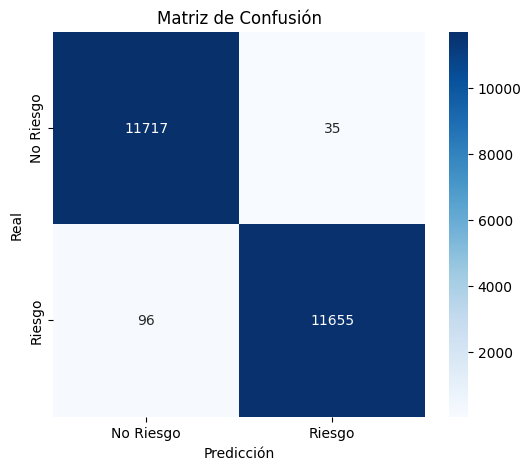

In [65]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Riesgo', 'Riesgo'], yticklabels=['No Riesgo', 'Riesgo'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [66]:
# Reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     11752
         1.0       1.00      0.99      0.99     11751

    accuracy                           0.99     23503
   macro avg       0.99      0.99      0.99     23503
weighted avg       0.99      0.99      0.99     23503



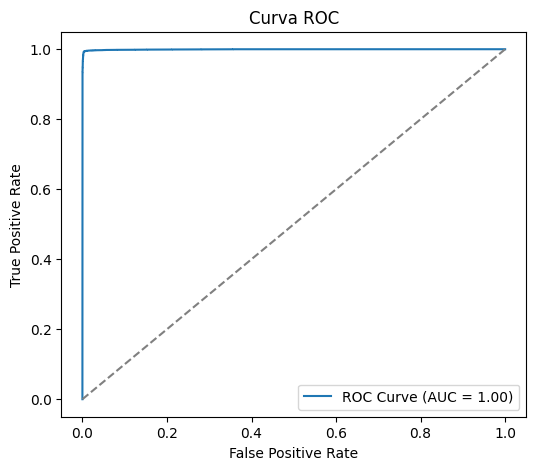

In [67]:
# Curva ROC y AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()


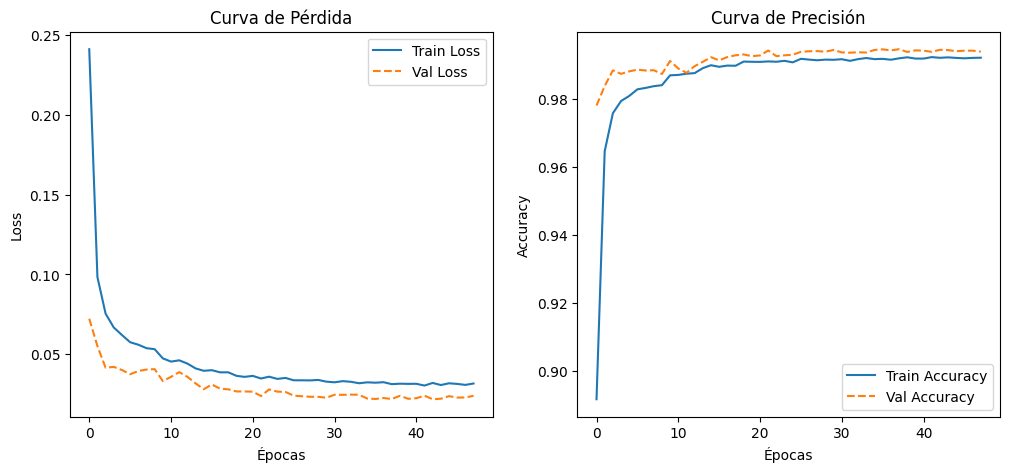

In [68]:
# Gráficos de entrenamiento
plt.figure(figsize=(12, 5))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], linestyle='dashed', label='Val Loss')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Curva de Pérdida')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], linestyle='dashed', label='Val Accuracy')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.title('Curva de Precisión')
plt.legend()

plt.show()

## Comparación de modelos

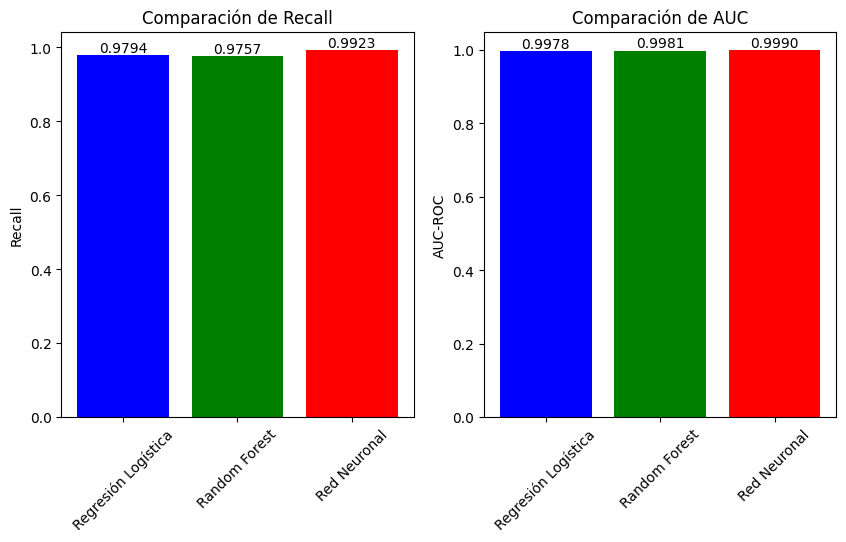

In [69]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Resultados de los modelos
results = {
    "Regresión Logística": {"recall": 0.9794, "auc": 0.9978, "conf_matrix": np.array([[11711, 41], [242, 11509]])},
    "Random Forest": {"recall": 0.9757, "auc": 0.9981, "conf_matrix": np.array([[11652, 100], [286, 11465]])},
    "Red Neuronal": {"recall": 0.9923, "auc": 0.999, "conf_matrix": np.array([[11716, 36], [91, 11660]])}
}

# Comparación de Recall y AUC
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
bars1 = plt.bar(results.keys(), [r["recall"] for r in results.values()], color=['blue', 'green', 'red'])
plt.ylabel("Recall")
plt.title("Comparación de Recall")
plt.xticks(rotation=45)
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.4f}', ha='center', va='bottom')

plt.subplot(1, 2, 2)
bars2 = plt.bar(results.keys(), [r["auc"] for r in results.values()], color=['blue', 'green', 'red'])
plt.ylabel("AUC-ROC")
plt.title("Comparación de AUC")
plt.xticks(rotation=45)
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.4f}', ha='center', va='bottom')

plt.show()


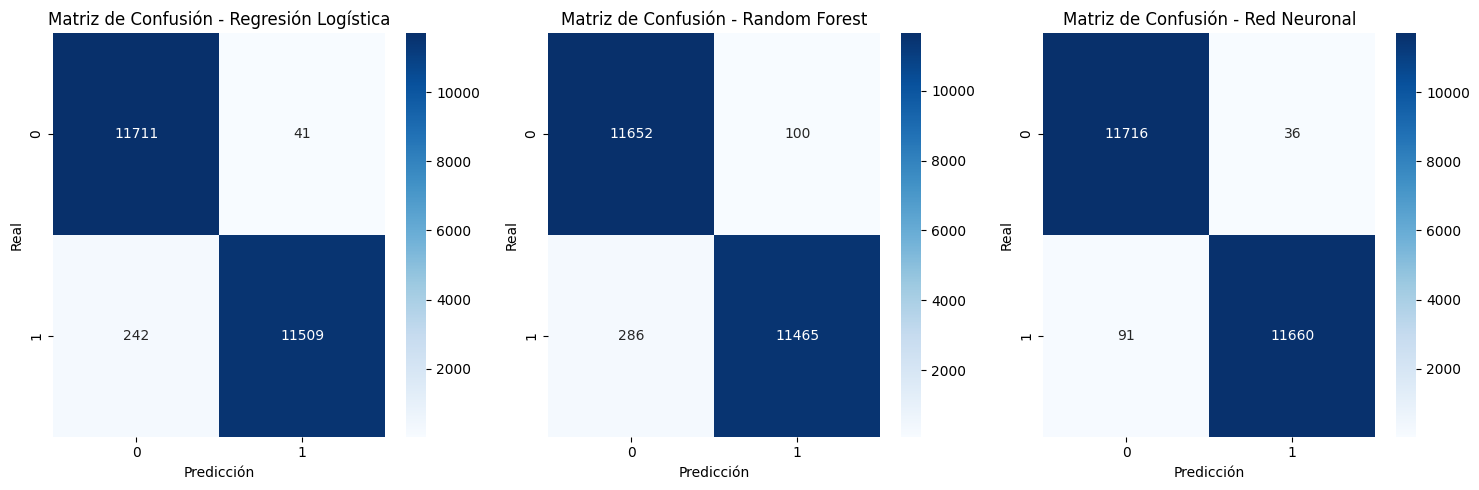

In [74]:
# Comparación de Matrices de Confusión
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, (name, res) in enumerate(results.items()):
    sns.heatmap(res["conf_matrix"], annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f"Matriz de Confusión - {name}")
    axes[idx].set_xlabel("Predicción")
    axes[idx].set_ylabel("Real")

plt.tight_layout()
plt.show()

# Optimización de Hiperparámetros

Vamos a seleccionar los hiperparametros de nuestra regresion logistica empleando la busqueda.

In [85]:
from sklearn.model_selection import RandomizedSearchCV


# Definimos la distribución de hiperparámetros para la búsqueda aleatoria
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', None],  # Tipo de regularización
    'C': np.logspace(-4, 4, 10),  # Parámetro de regularización inverso
    'solver': ['lbfgs', 'liblinear', 'saga', 'newton-cg', 'sag'],  # Algoritmos de optimización
    'max_iter': [100, 200, 500, 1000],  # Número máximo de iteraciones
    'l1_ratio': np.linspace(0, 1, 5)  # Solo se usa si penalty='elasticnet'
}

# Definimos el modelo base
base_estimator = LogisticRegression(random_state=0)

# Realizamos la búsqueda aleatoria de hiperparámetros
logreg_randomSearch = RandomizedSearchCV(
    base_estimator, 
    param_dist, 
    n_iter=20,  # Número de combinaciones aleatorias a probar
    cv=5,  # Validación cruzada
    scoring='accuracy',  # Métrica de evaluación
    random_state=0, 
    n_jobs=-1  # Paralelización
)


logreg_randomSearch.fit(X_train, y_train)

/root/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
55 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/root/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueError: Solv

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                                        'l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                                        'max_iter': [100, 200, 500, 1000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['lbfgs', 'liblinear', 'saga',
                                                   'newton-cg', 'sag']},
                   random_state=0, scoring='accuracy')

In [87]:
print("Mejores hiperparámetros:", logreg_randomSearch.best_params_)

print("Mejor puntaje de validación cruzada:", logreg_randomSearch.best_score_)

best_model = logreg_randomSearch.best_estimator_
print("Mejor modelo:", best_model)


Mejores hiperparámetros: {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 200, 'l1_ratio': 0.75, 'C': 1291.5496650148827}
Mejor puntaje de validación cruzada: 0.9881394413740029
Mejor modelo: LogisticRegression(C=1291.5496650148827, l1_ratio=0.75, max_iter=200,
                   random_state=0, solver='newton-cg')


Ahora se hará la búsqueda de los mejores hiperparámetros pero de froma aleatoria para bosques aleatorios.

In [89]:
from sklearn.model_selection import RandomizedSearchCV

# Definimos la grilla de hiperparámetros
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30, 40, 50],  # Profundidad máxima de los árboles
    'min_samples_split': np.arange(2, 10, 2),  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': np.arange(1, 10, 2),  # Mínimo de muestras por hoja
    'max_features': ['auto', 'sqrt', 'log2'],  # Número máximo de características consideradas
    'bootstrap': [True, False],  # Si se usa muestreo con reemplazo
    'criterion': ['gini', 'entropy'],  # Función de medición de la calidad de la división
}


base_estimator = RandomForestClassifier(random_state=0)

# Realizamos la búsqueda aleatoria de hiperparámetros
RF_randomSearch = RandomizedSearchCV(
    base_estimator, 
    param_dist, 
    n_iter=20,  # Número de combinaciones aleatorias a probar
    cv=5,  # Validación cruzada
    scoring='accuracy',  # Métrica de evaluación
    random_state=0, 
    n_jobs=-1  # Paralelización
)

RF_randomSearch.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=0, scoring='accuracy')

In [101]:
print("Mejores hiperparámetros:", RF_randomSearch.best_params_)

print("Mejor puntaje de validación cruzada:", RF_randomSearch.best_score_)

best_model = RF_randomSearch.best_estimator_
print("Mejor modelo:", best_model)

Mejores hiperparámetros: {'n_estimators': 190, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}
Mejor puntaje de validación cruzada: 0.9853099313865152
Mejor modelo: RandomForestClassifier(bootstrap=False, min_samples_split=6, n_estimators=190,
                       random_state=0)


Por último, se realiza la elección de los hiperparámetros de una red neuronal de forma aleatoria.

In [109]:
pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 20.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [103]:
def model_builder(hp):
    model = keras.Sequential()
    
    # Primera capa oculta con número de neuronas optimizable
    hp_units_1 = hp.Int('units_1', min_value=32, max_value=512, step=32)
    model.add(keras.layers.Dense(units=hp_units_1, activation="relu", input_shape=(X_train.shape[1],)))
    
    # Segunda capa oculta opcional
    if hp.Boolean('second_layer'):
        hp_units_2 = hp.Int('units_2', min_value=32, max_value=256, step=32)
        model.add(keras.layers.Dense(units=hp_units_2, activation="relu"))

    # Capa de salida para clasificación binaria
    model.add(keras.layers.Dense(1, activation="sigmoid"))

    # Selección de la tasa de aprendizaje
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Compilar el modelo con Adam
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    
    return model


In [111]:
import keras_tuner as kt

# Configuración del tuner de búsqueda aleatoria
tuner = kt.RandomSearch(
    model_builder,
    objective="val_accuracy",
    max_trials=10,  # Número de combinaciones a probar
    executions_per_trial=2,  # Para reducir la variabilidad
    directory='tuner_results',  # Carpeta donde se guardarán los resultados
    project_name='binary_classification_tuning'
)


In [113]:
stop_early = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)


In [117]:
tuner.search(X_train, y_train, 
             epochs=100, 
             batch_size=128, 
             validation_data=(X_test, y_test), 
             callbacks=[stop_early, reduce_lr], 
             verbose=1)


Trial 10 Complete [00h 03m 10s]
val_accuracy: 0.9911288022994995

Best val_accuracy So Far: 0.9934476315975189
Total elapsed time: 00h 33m 55s


In [119]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Mostrar los mejores valores encontrados
print(f"Mejor número de neuronas en la primera capa: {best_hps.get('units_1')}")
if best_hps.get('second_layer'):
    print(f"Mejor número de neuronas en la segunda capa: {best_hps.get('units_2')}")
print(f"Mejor tasa de aprendizaje: {best_hps.get('learning_rate')}")


Mejor número de neuronas en la primera capa: 32
Mejor número de neuronas en la segunda capa: 64
Mejor tasa de aprendizaje: 0.01


In [125]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1248      
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 3425 (13.38 KB)
Trainable params: 3425 (13.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [127]:
#Evaluacion del modelo
best_model.evaluate(X_test, y_test)

735/735 [==============================] - 1s 1ms/step - loss: 0.0288 - accuracy: 0.9936


[0.028786886483430862, 0.993617832660675]

## **Resumen del proceso de optimización del modelo**

En este proceso, se llevó a cabo la optimización de una **red neuronal para clasificación binaria** utilizando **Keras Tuner** con búsqueda aleatoria de hiperparámetros. El objetivo fue mejorar el desempeño del modelo sin modificar el optimizador, manteniendo **Adam** como optimizador principal.

---

## **Metodología**
### 1. **Definición de la arquitectura del modelo**
- La primera capa oculta cuenta con un número de neuronas variable entre **32 y 512**.
- Se incorpora una **segunda capa oculta opcional**, con un rango de **32 a 256** neuronas.
- La capa de salida es de una sola neurona con activación sigmoide para la clasificación binaria.

### 2. **Optimización de hiperparámetros mediante búsqueda aleatoria**
- Se ajustó el número de neuronas en la primera capa en el rango de **32 a 512**.
- La segunda capa oculta, si está presente, tiene entre **32 y 256** neuronas.
- Se exploraron diferentes valores para la **tasa de aprendizaje**: `0.01`, `0.001`, y `0.0001`.
- Se evaluaron **10 combinaciones** de hiperparámetros (`max_trials=10`).

### 3. **Estrategias para mejorar la convergencia y prevenir el sobreajuste**
- Se utilizó **EarlyStopping**, deteniendo el entrenamiento si la pérdida de validación no mejora en cinco iteraciones consecutivas.
- Se implementó **ReduceLROnPlateau**, reduciendo la tasa de aprendizaje si la pérdida de validación no mejora en tres iteraciones consecutivas.

### 4. **Entrenamiento del modelo con los mejores hiperparámetros**
- Se seleccionaron los mejores hiperparámetros obtenidos mediante la búsqueda aleatoria.
- El modelo fue reentrenado con la configuración óptima.

---

## **Resultados obtenidos**
- **Pérdida (`loss`) en validación:** `0.0287`
- **Precisión (`accuracy`) en validación:** `99.36%`

El modelo alcanzó una **precisión del 99.36%**, lo que indica que la optimización de hiperparámetros mejoró su capacidad predictiva.  
La pérdida de validación es baja (`0.0287`), lo que sugiere que el modelo ha logrado **generalizar adecuadamente** sobre los datos de prueba.

---

## **Conclusiones**
- La optimización de hiperparámetros permitió mejorar significativamente el desempeño del modelo sin modificar el optimizador.
- El uso de **EarlyStopping** y **ReduceLROnPlateau** contribuyó a mejorar la estabilidad del entrenamiento y prevenir el sobreajuste.
- Los resultados obtenidos indican que la arquitectura ajustada es adecuada para el problema abordado.

---

## **Recomendaciones para futuras mejoras**
Para seguir optimizando el modelo, se podrían considerar las siguientes estrategias:
- Incrementar el número de combinaciones evaluadas en la búsqueda (`max_trials=20` o más) para explorar un mayor espacio de hiperparámetros.
- Aumentar el tamaño del conjunto de datos si se detectan signos de sobreajuste.

Este proceso ha demostrado la importancia de la optimización de hiperparámetros para mejorar el desempeño de modelos de aprendizaje profundo.


# Referencias 

[1] Dark_Raider. (2021). Credit Risk Analysis. Kaggle. https://www.kaggle.com/datasets/ranadeep/credit-risk-dataset/data

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7e5f1356-ea9b-4a9a-999a-50284c472e0a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>